# Importing necessary library

In [413]:
import sys
sys.path.insert(0, '../src')
from terminal_script import read_data
from terminal_script import plot_top_10_by_state
from terminal_script import two_sample_t_test
from terminal_script import t_test_against_others
from terminal_script import t_test_weather_quan
from terminal_script import t_test_weather_city
from terminal_script import airline_t_test
import importlib
importlib.reload(sys.modules['terminal_script'])

<module 'terminal_script' from '../src/terminal_script.py'>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Loading Source Data into Pandas

In [23]:
df_raw = read_data('../data/2020_01_ALL.csv')

In [87]:
df_raw.sample(5)

YEAR  QUARTER  MONTH     FL_DATE OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM  \
420191  2020        1      1  2020-01-28                UA               2421   
606543  2020        1      1  2020-01-30                9E               4937   
23814   2020        1      1  2020-01-16                YV               6095   
259678  2020        1      1  2020-01-16                OO               5617   
105035  2020        1      1  2020-01-20                UA               2400   

        ORIGIN_AIRPORT_ID ORIGIN   ORIGIN_CITY_NAME ORIGIN_STATE_ABR  ...  \
420191              12266    IAH        Houston, TX               TX  ...   
606543              11193    CVG     Cincinnati, OH               KY  ...   
23814               10693    BNA      Nashville, TN               TN  ...   
259678              14771    SFO  San Francisco, CA               CA  ...   
105035              10721    BOS         Boston, MA               MA  ...   

        DEST_STATE_ABR CRS_DEP_TIME DEP_TIME DEP_DELAY  CRS_ARR_TIME  \
420191              NV          745    735.0     -10.0           911   
606543              TX          715    714.0      -1.0           909   
23814               TX          620    608.0     -12.0           855   
259678              ID          833    908.0      35.0          1141   
105035              CA         1753   1750.0      -3.0          2150   

        ARR_TIME  ARR_DELAY  CANCELLED  DISTANCE  Unnamed: 22  
420191     853.0      -18.0        0.0    1222.0          NaN  
606543     843.0      -26.0        0.0     812.0          NaN  
23814      825.0      -30.0        0.0     657.0          NaN  
259678    1254.0       73.0        0.0     587.0          NaN  
105035    2059.0      -51.0        0.0    2704.0          NaN  

[5 rows x 23 columns]

In [88]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 23 columns):
YEAR                 607346 non-null int64
QUARTER              607346 non-null int64
MONTH                607346 non-null int64
FL_DATE              607346 non-null object
OP_UNIQUE_CARRIER    607346 non-null object
OP_CARRIER_FL_NUM    607346 non-null int64
ORIGIN_AIRPORT_ID    607346 non-null int64
ORIGIN               607346 non-null object
ORIGIN_CITY_NAME     607346 non-null object
ORIGIN_STATE_ABR     607346 non-null object
DEST_AIRPORT_ID      607346 non-null int64
DEST                 607346 non-null object
DEST_CITY_NAME       607346 non-null object
DEST_STATE_ABR       607346 non-null object
CRS_DEP_TIME         607346 non-null int64
DEP_TIME             600682 non-null float64
DEP_DELAY            600647 non-null float64
CRS_ARR_TIME         607346 non-null int64
ARR_TIME             600271 non-null float64
ARR_DELAY            599268 non-null float64
CANCELLED    

In [17]:
print(df_raw['ORIGIN_CITY_NAME'].unique())
df_raw['ORIGIN_CITY_NAME'].nunique()

['Ontario, CA' 'Norfolk, VA' 'West Palm Beach/Palm Beach, FL'
 'Portland, OR' 'Philadelphia, PA' 'Phoenix, AZ' 'Pittsburgh, PA'
 'Pensacola, FL' 'Providence, RI' 'Portland, ME' 'Raleigh/Durham, NC'
 'Richmond, VA' 'Reno, NV' 'Rochester, NY' 'Fort Myers, FL'
 'San Diego, CA' 'San Antonio, TX' 'Louisville, KY' 'Seattle, WA'
 'San Francisco, CA' 'San Jose, CA' 'San Juan, PR' 'Salt Lake City, UT'
 'Sacramento, CA' 'Santa Ana, CA' 'St. Louis, MO' 'Tampa, FL' 'Tulsa, OK'
 'Tucson, AZ' 'Albuquerque, NM' 'Albany, NY' 'Amarillo, TX' 'Atlanta, GA'
 'Austin, TX' 'Dallas, TX' 'New Orleans, LA' 'Oakland, CA' 'Kahului, HI'
 'Oklahoma City, OK' 'Omaha, NE' 'Hartford, CT' 'Birmingham, AL'
 'Nashville, TN' 'Boise, ID' 'Boston, MA' 'Buffalo, NY' 'Burbank, CA'
 'Baltimore, MD' 'Charleston, SC' 'Cleveland, OH' 'Charlotte, NC'
 'Columbus, OH' 'Corpus Christi, TX' 'Cincinnati, OH' 'Washington, DC'
 'Denver, CO' 'Des Moines, IA' 'Detroit, MI' 'Panama City, FL'
 'El Paso, TX' 'Fort Lauderdale, FL' 'Spokane, W

344

In [18]:
print(df_raw['DEST_CITY_NAME'].unique())
df_raw['DEST_CITY_NAME'].nunique()

['San Francisco, CA' 'San Jose, CA' 'Sacramento, CA' 'Baltimore, MD'
 'Orlando, FL' 'Chicago, IL' 'Atlanta, GA' 'Islip, NY' 'Burbank, CA'
 'Dallas, TX' 'Denver, CO' 'Las Vegas, NV' 'Los Angeles, CA' 'Oakland, CA'
 'Ontario, CA' 'Phoenix, AZ' 'San Diego, CA' 'St. Louis, MO'
 'Nashville, TN' 'Fort Lauderdale, FL' 'Houston, TX' 'Tampa, FL'
 'Albuquerque, NM' 'Austin, TX' 'Boise, ID' 'Buffalo, NY' 'Cleveland, OH'
 'Columbus, OH' 'Detroit, MI' 'El Paso, TX' 'Spokane, WA' 'Wichita, KS'
 'Indianapolis, IN' 'Little Rock, AR' 'Kansas City, MO' 'Milwaukee, WI'
 'Minneapolis, MN' 'New Orleans, LA' 'Oklahoma City, OK' 'Omaha, NE'
 'Portland, OR' 'Philadelphia, PA' 'Pittsburgh, PA' 'Raleigh/Durham, NC'
 'Reno, NV' 'San Antonio, TX' 'Louisville, KY' 'Seattle, WA'
 'Salt Lake City, UT' 'Santa Ana, CA' 'Tulsa, OK' 'Fort Myers, FL'
 'Washington, DC' 'Hartford, CT' 'Tucson, AZ' 'Honolulu, HI'
 'Long Beach, CA' 'Kahului, HI' 'Boston, MA' 'Des Moines, IA'
 'New York, NY' 'Albany, NY' 'Birmingham, AL' 'Mem

343

In [12]:
most_popular_origin = df_raw['ORIGIN_CITY_NAME'].value_counts().head(20)
most_popular_origin

Atlanta, GA              32190
Chicago, IL              31796
Dallas/Fort Worth, TX    24339
New York, NY             24148
Denver, CO               20398
Charlotte, NC            19995
Houston, TX              19711
Los Angeles, CA          17799
Washington, DC           16680
Phoenix, AZ              15820
Las Vegas, NV            14186
San Francisco, CA        13684
Detroit, MI              13195
Orlando, FL              12820
Minneapolis, MN          12429
Boston, MA               12182
Seattle, WA              11583
Newark, NJ               11415
Salt Lake City, UT       10196
Fort Lauderdale, FL       9446
Name: ORIGIN_CITY_NAME, dtype: int64

In [16]:
print(f'total number of flights:{np.sum(most_popular_origin)}')
print(f'from top 10 airports:{np.sum(most_popular_origin[0:10])}')
print(f'proportion:{np.sum(most_popular_origin[0:10])/np.sum(most_popular_origin):.2f}')

total number of flights:344012
from top 10 airports:222876
proportion:0.65


In [90]:
most_popular_dest = df_raw['DEST_CITY_NAME'].value_counts().head(20)
most_popular_dest

Atlanta, GA              32187
Chicago, IL              31824
Dallas/Fort Worth, TX    24354
New York, NY             24138
Denver, CO               20405
Charlotte, NC            20002
Houston, TX              19709
Los Angeles, CA          17794
Washington, DC           16672
Phoenix, AZ              15828
Las Vegas, NV            14184
San Francisco, CA        13686
Detroit, MI              13190
Orlando, FL              12816
Minneapolis, MN          12428
Boston, MA               12190
Seattle, WA              11585
Newark, NJ               11420
Salt Lake City, UT       10213
Fort Lauderdale, FL       9445
Name: DEST_CITY_NAME, dtype: int64

# Top airports by State (CA, NY, TX)

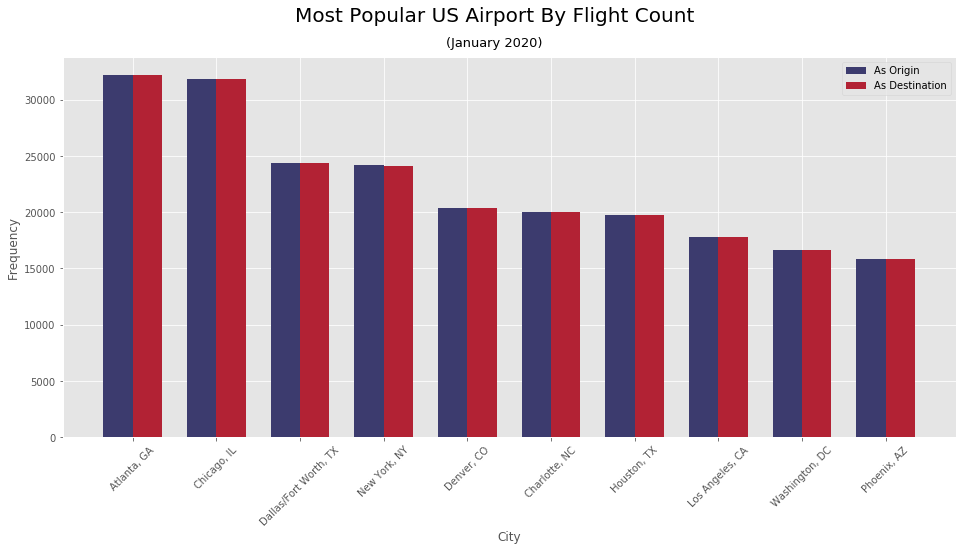

In [91]:
plot_top_10_by_state(df_raw,'US','#3C3B6E','#B22234')

In [307]:
plot_top_10_by_state(df_raw,'CA','#1295D8','#FFB511')

NameError: name 'df_raw' is not defined

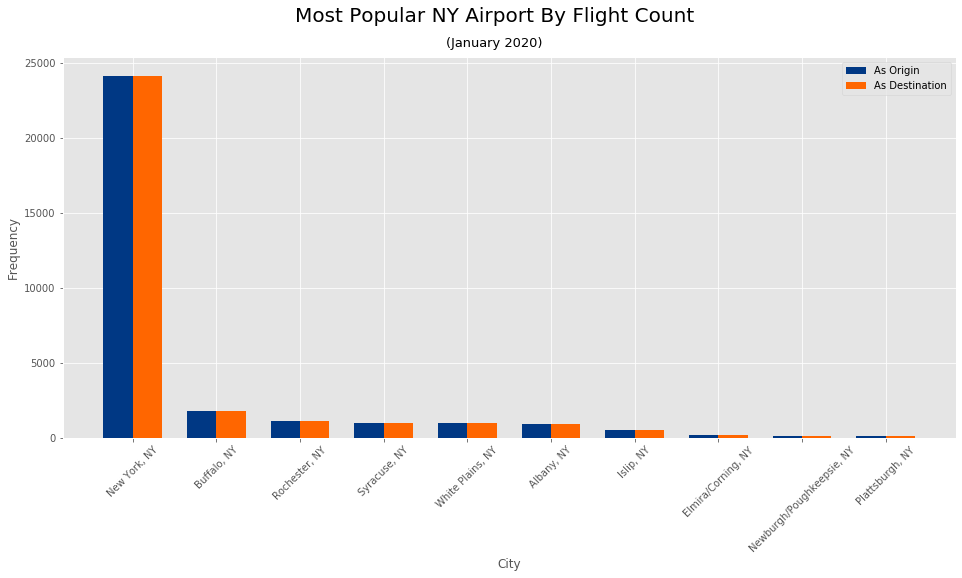

In [93]:
plot_top_10_by_state(df_raw,'NY','#003884','#ff6600')

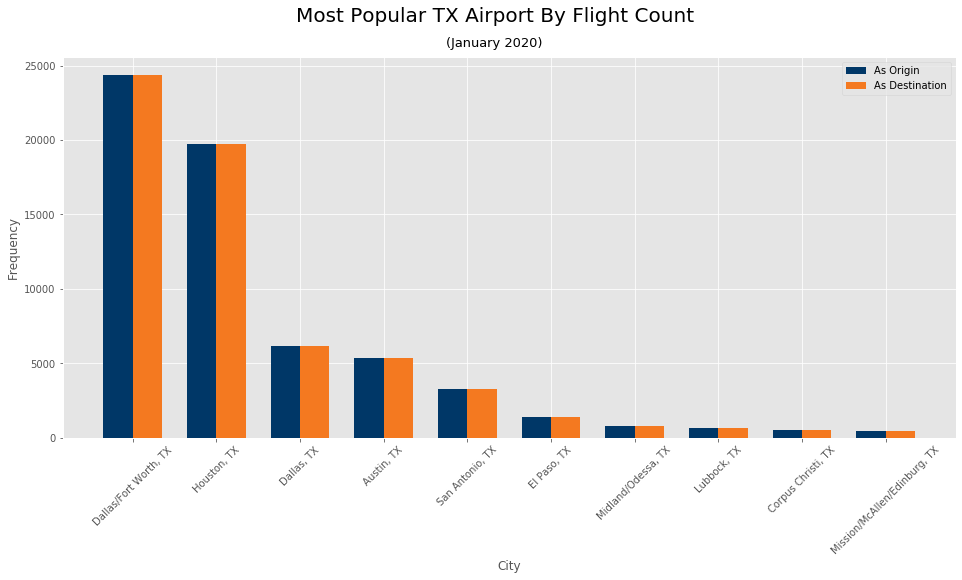

In [94]:
plot_top_10_by_state(df_raw,'TX','#003767','#F47920')

# Cancelled Flight Statistics

In [4]:
cancelled_flight = df_raw.groupby('ORIGIN_CITY_NAME').agg(
    total_flight=pd.NamedAgg(column='CANCELLED',aggfunc='count'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum')
).sort_values(by='cancelled_count',ascending=False)
cancelled_flight

total_flight  cancelled_count
ORIGIN_CITY_NAME                                    
Chicago, IL                   31796           1138.0
Dallas/Fort Worth, TX         24339            466.0
Denver, CO                    20398            205.0
Dallas, TX                     6167            200.0
Kansas City, MO                4321            198.0
...                             ...              ...
Elko, NV                         58              0.0
Dothan, AL                      115              0.0
Daytona Beach, FL               302              0.0
St. Cloud, MN                    13              0.0
Yuma, AZ                        186              0.0

[344 rows x 2 columns]

In [5]:
cancelled_flight = cancelled_flight.reset_index()

Text(0.5, 0.9, 'Airport with most cancelled flights in Jan 2020')

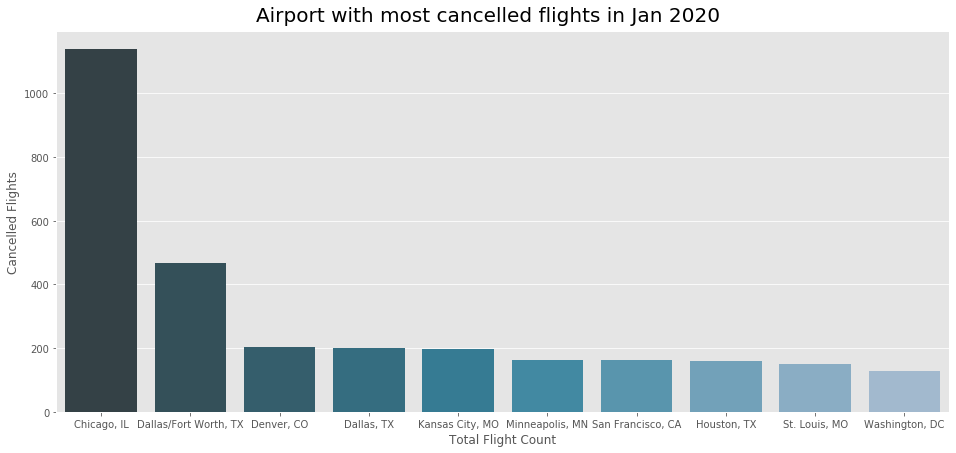

In [78]:
cancelled_flight[0:10]
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_count',data=cancelled_flight[0:10],palette='PuBuGn_d')
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.9,'Airport with most cancelled flights in Jan 2020', fontsize=20, ha='center')

In [81]:
cancelled_flight['cancelled_rate'] = cancelled_flight['cancelled_count'] / cancelled_flight['total_flight']

In [83]:
cancelled_flight.sort_values(by='cancelled_rate',ascending=False)

ORIGIN_CITY_NAME  total_flight  cancelled_count  \
28   Sun Valley/Hailey/Ketchum, ID           196             54.0   
72                  Ogdensburg, NY            62             14.0   
94                     Cordova, AK            60             10.0   
109                   Muskegon, MI            61              9.0   
130                    Yakutat, AK            60              8.0   
..                             ...           ...              ...   
310                Santa Maria, CA            16              0.0   
311                   Columbus, MS           112              0.0   
312                     Saipan, TT            44              0.0   
313                      Ogden, UT             9              0.0   
343                       Yuma, AZ           186              0.0   

     cancelled_rate  
28         0.275510  
72         0.225806  
94         0.166667  
109        0.147541  
130        0.133333  
..              ...  
310        0.000000  
311        0.000000  
312        0.000000  
313        0.000000  
343        0.000000  

[344 rows x 4 columns]

Text(0.5, 0.9, 'Airport with highest cancellation rate in Jan 2020')

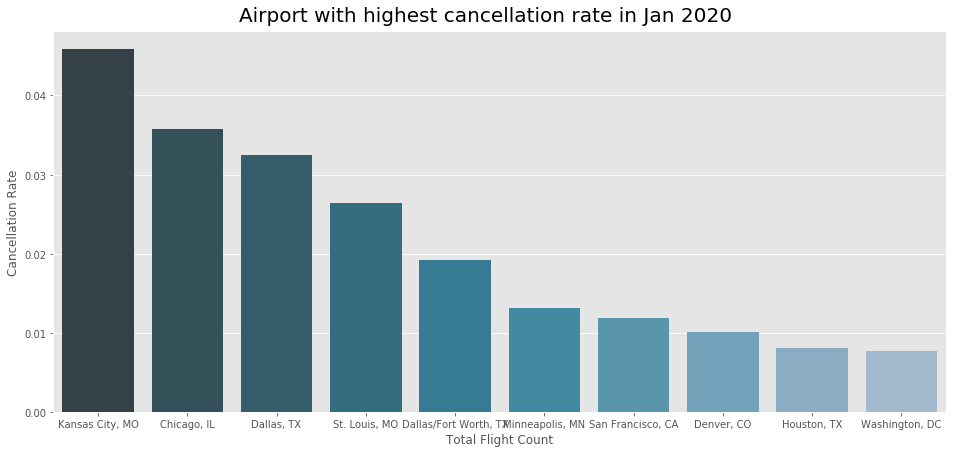

In [86]:
cancelled_flight = cancelled_flight[0:10].sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight[0:10],palette='PuBuGn_d')
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Airport with highest cancellation rate in Jan 2020', fontsize=20, ha='center')

#### Correlation between flight count and cancelled flight count

In [68]:
cancelled_flight.describe()

total_flight  cancelled_count
count    344.000000       344.000000
mean    1765.540698        20.139535
std     4380.956291        72.383400
min        1.000000         0.000000
25%       85.000000         1.000000
50%      273.000000         5.000000
75%     1026.750000        11.000000
max    32190.000000      1138.000000

In [38]:
cancelled_flight.corr()

total_flight  cancelled_count
total_flight         1.000000         0.704857
cancelled_count      0.704857         1.000000

Text(0.85, 0.37, 'r = .705')

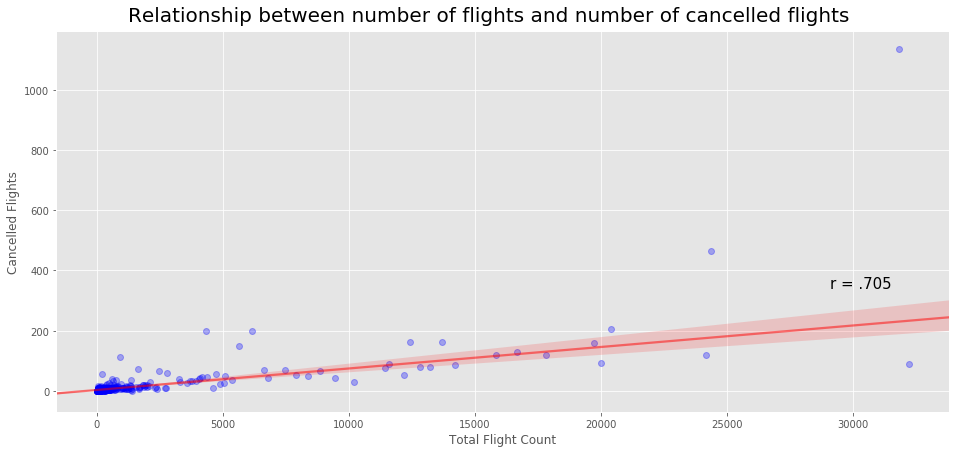

In [67]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=cancelled_flight,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.9,'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.85,.37,'r = .705', fontsize=15, ha='right')

#### Focus on busy airports: Flight > median

In [6]:
busy_airport = cancelled_flight[(cancelled_flight['total_flight'] > 273)]
busy_airport

ORIGIN_CITY_NAME  total_flight  cancelled_count
0              Chicago, IL         31796           1138.0
1    Dallas/Fort Worth, TX         24339            466.0
2               Denver, CO         20398            205.0
3               Dallas, TX          6167            200.0
4          Kansas City, MO          4321            198.0
..                     ...           ...              ...
302           Billings, MT           308              0.0
305      Atlantic City, NJ           287              0.0
321         Long Beach, CA          1399              0.0
328         St. George, UT           335              0.0
341      Daytona Beach, FL           302              0.0

[172 rows x 3 columns]

In [55]:
busy_airport.corr()

total_flight  cancelled_count
total_flight         1.000000         0.685406
cancelled_count      0.685406         1.000000

Text(0.85, 0.37, 'r = .685')

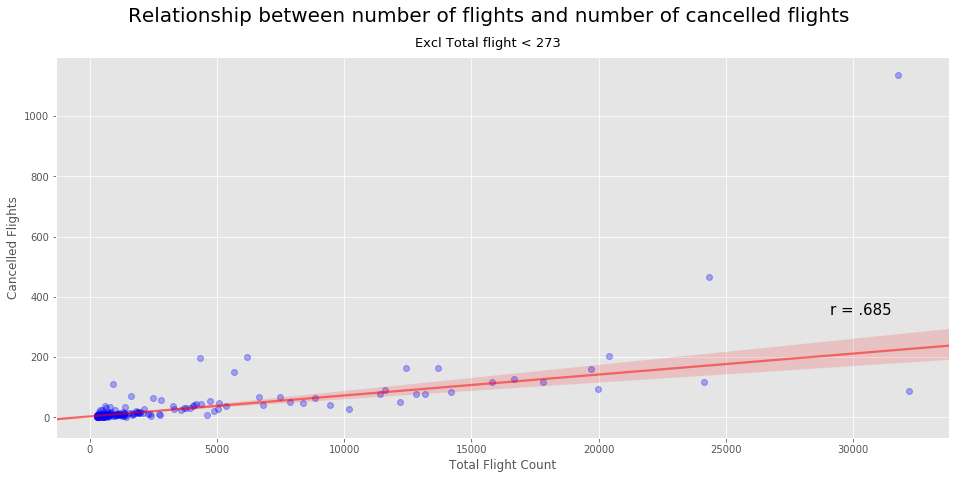

In [63]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=busy_airport,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.95,'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.5,.9,'Excl Total flight < 273', fontsize=13, ha='center')
plt.figtext(.85,.37,'r = .685', fontsize=15, ha='right')

#### Excluding outliers (Chicago, Dal/FW)

In [7]:
busy_airport_excl_outlier = cancelled_flight[(cancelled_flight['total_flight'] > 273) & (cancelled_flight['ORIGIN_CITY_NAME'] != 'Chicago, IL') & (cancelled_flight['ORIGIN_CITY_NAME'] != 'Dallas/Fort Worth, TX')]

busy_airport_excl_outlier

ORIGIN_CITY_NAME  total_flight  cancelled_count
2           Denver, CO         20398            205.0
3           Dallas, TX          6167            200.0
4      Kansas City, MO          4321            198.0
5      Minneapolis, MN         12429            163.0
6    San Francisco, CA         13684            163.0
..                 ...           ...              ...
302       Billings, MT           308              0.0
305  Atlantic City, NJ           287              0.0
321     Long Beach, CA          1399              0.0
328     St. George, UT           335              0.0
341  Daytona Beach, FL           302              0.0

[170 rows x 3 columns]

In [37]:
busy_airport_excl_outlier.corr()

total_flight  cancelled_count
total_flight          1.00000          0.74625
cancelled_count       0.74625          1.00000

Text(0.79, 0.7, 'r = .746')

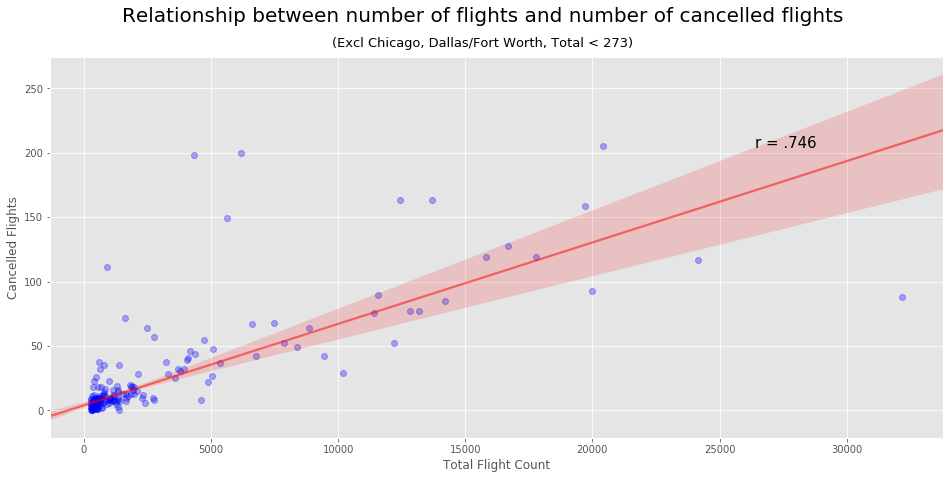

In [66]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=busy_airport_excl_outlier,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.95,f'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.5,.9,'(Excl Chicago, Dallas/Fort Worth, Total < 273)',fontsize=13,ha='center')
plt.figtext(.79,.7,'r = .746', fontsize=15, ha='right')

# Flight Delay Statistics

In [151]:
flight_delay = df_raw.groupby('ORIGIN_CITY_NAME').agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    average_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    std_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='std')
).sort_values(by='average_delay_min',ascending=False)
flight_delay

total_flight  average_delay_min  std_delay_min
ORIGIN_CITY_NAME                                                
Alpena, MI                  53          58.962264     266.735822
Williston, ND               67          58.746269     232.130537
Pellston, MI                75          55.400000     289.451905
Marquette, MI               92          54.336957     170.569974
Escanaba, MI                53          53.396226     219.408851
...                        ...                ...            ...
Watertown, SD               56          -6.250000      24.373048
Cedar City, UT              54          -6.277778      12.558417
Quincy, IL                  10          -7.600000       7.275530
Jamestown, ND               74          -9.432432      39.892692
Nome, AK                    60         -10.500000      19.848152

[344 rows x 3 columns]

In [110]:
delay_sfo = flight_delay.loc['San Francisco, CA']
delay_sfo

total_flight         13524.000000
average_delay_min       12.588287
std_delay_min           44.671065
Name: San Francisco, CA, dtype: float64

In [150]:
df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].describe()

count    13524.000000
mean         9.048802
std         44.671065
min        -23.000000
25%         -6.000000
50%         -3.000000
75%          4.000000
max       1118.000000
Name: DEP_DELAY, dtype: float64

#### 95% CI

In [160]:
print(df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].quantile(q=0.025))
print(df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].quantile(q=0.975))

-12.0
117.0


In [4]:
sfo_delay_early = df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA") & (df_raw['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values(by='DEP_DELAY',ascending=False)
sfo_delay_early

ORIGIN_CITY_NAME  DEP_DELAY
252122  San Francisco, CA     1118.0
268330  San Francisco, CA      960.0
95569   San Francisco, CA      942.0
41375   San Francisco, CA      822.0
554428  San Francisco, CA      796.0
...                   ...        ...
508705  San Francisco, CA      -21.0
355929  San Francisco, CA      -22.0
354696  San Francisco, CA      -23.0
507418  San Francisco, CA      -23.0
355967  San Francisco, CA      -23.0

[13524 rows x 2 columns]

Text(0.5, 0.95, 'Flight Delay (As Origin)')

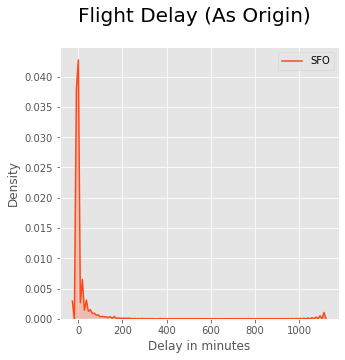

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.distplot(sfo_delay_early.DEP_DELAY, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 1.5, 'color': '#FF4819'}, label="SFO")

ax.set_xlabel('Delay in minutes')
ax.set_ylabel('Density')
# plt.xlim(-23,117)
plt.figtext(.5,.95,'Flight Delay (As Origin)', fontsize=20, ha='center')

In [11]:
airport_list = ['Atlanta, GA',
'Chicago, IL',
'Dallas/Fort Worth, TX',
'New York, NY',
'Denver, CO',
'Charlotte, NC',
'Houston, TX',
'Los Angeles, CA',
'Washington, DC',
'Phoenix, AZ',
'San Francisco, CA']

multi_delay_early = df_raw[(df_raw['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_raw['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values(by='DEP_DELAY',ascending=False)
multi_delay_early

ORIGIN_CITY_NAME  DEP_DELAY
373634      Chicago, IL     1596.0
249809  Los Angeles, CA     1495.0
373641      Chicago, IL     1394.0
426931       Denver, CO     1370.0
283249     New York, NY     1352.0
...                 ...        ...
488932   Washington, DC      -26.0
578091      Houston, TX      -27.0
90680    Washington, DC      -27.0
89128       Chicago, IL      -29.0
540140   Washington, DC      -31.0

[233884 rows x 2 columns]

In [30]:
# total # of flight
multi_delay_early['ORIGIN_CITY_NAME'].value_counts()

Atlanta, GA              32107
Chicago, IL              30688
New York, NY             24035
Dallas/Fort Worth, TX    23891
Denver, CO               20211
Charlotte, NC            19911
Houston, TX              19565
Los Angeles, CA          17683
Washington, DC           16559
Phoenix, AZ              15710
San Francisco, CA        13524
Name: ORIGIN_CITY_NAME, dtype: int64

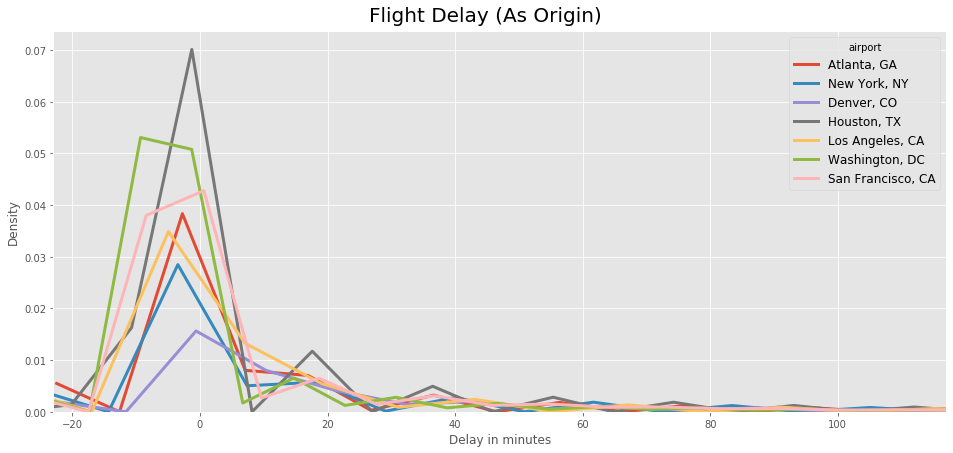

In [47]:
fig, ax = plt.subplots(figsize=(16,7))

for airport in airport_list:
    one_airport = multi_delay_early[multi_delay_early['ORIGIN_CITY_NAME'] == airport]
    sns.distplot(one_airport['DEP_DELAY'], hist=False, kde=True, kde_kws={'linewidth':3},label=airport)

ax.set_xlabel('Delay in minutes')
ax.set_ylabel('Density')
plt.figtext(.5,.9,'Flight Delay (As Origin)', fontsize=20, ha='center')
plt.xlim(-23,117)
plt.legend(prop={'size':12},title='airport')

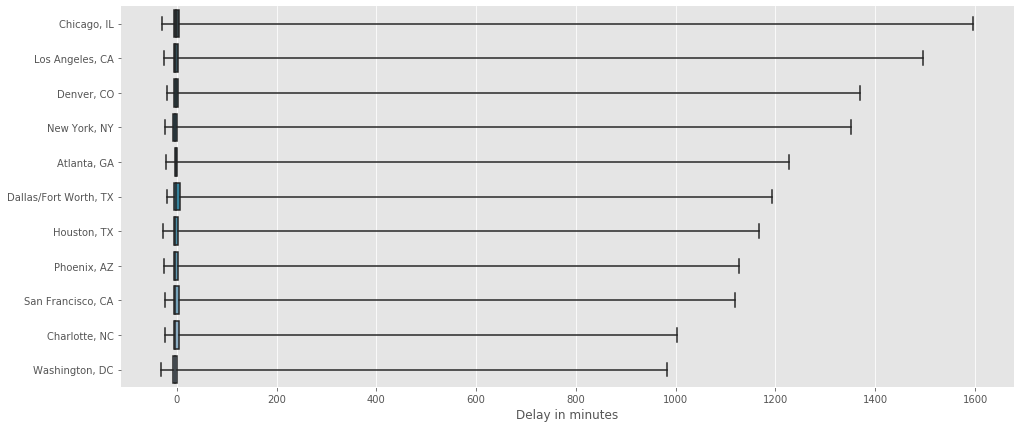

In [26]:
fig, ax = plt.subplots(figsize=(16,7))

sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=multi_delay_early,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

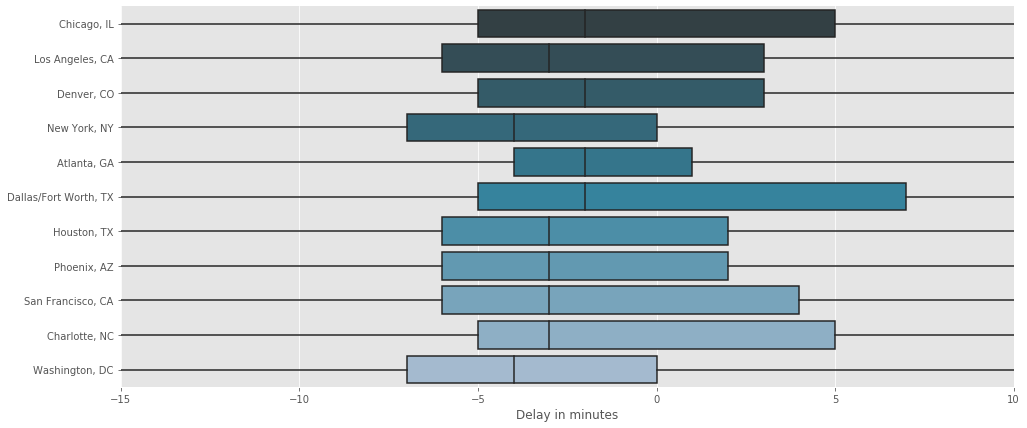

In [24]:
fig, ax = plt.subplots(figsize=(16,7))

sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=multi_delay_early,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
ax.set(xlabel="Delay in minutes",ylabel="")
plt.xlim(-15,10)
sns.despine(trim=True, left=True)

In [37]:
for airport in airport_list:
    left = df_raw[(df_raw['ORIGIN_CITY_NAME'] == airport) & (df_raw['DEP_DELAY'].isnull() == False)]['DEP_DELAY'].quantile(q=0.025)
    right = df_raw[(df_raw['ORIGIN_CITY_NAME'] == airport) & (df_raw['DEP_DELAY'].isnull() == False)]['DEP_DELAY'].quantile(q=0.975)
    print(f'95% CI of {airport} airport is: {left:.2f}, {right:.2f}')

95% CI of Atlanta, GA airport is: -9.00, 67.00
95% CI of Chicago, IL airport is: -10.00, 96.00
95% CI of Dallas/Fort Worth, TX airport is: -9.00, 113.00
95% CI of New York, NY airport is: -13.00, 96.00
95% CI of Denver, CO airport is: -11.00, 83.75
95% CI of Charlotte, NC airport is: -10.00, 88.00
95% CI of Houston, TX airport is: -11.00, 86.90
95% CI of Los Angeles, CA airport is: -12.00, 86.00
95% CI of Washington, DC airport is: -14.00, 108.00
95% CI of Phoenix, AZ airport is: -11.00, 71.00
95% CI of San Francisco, CA airport is: -12.00, 117.00


# T-Test (Traffic Data)

Null Hypothesis: Delay time between San Francisco airport and Atlanta airport are the same
<br>
Alternate Hypothesis: Delay time between SF airport and ATL airport are different
<br>
alpha = 0.05
<br>
N = 300

In [28]:
SFO_N, ATL_N, SFO_avg, ATL_avg, co_var, t_score, p_val = two_sample_t_test(df_raw,'San Francisco, CA', 'Atlanta, GA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of ATL:{ATL_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of ATL:{ATL_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:13524
Sample Size of ATL:32107
Average delay of SFO:9.05
Average delay of ATL:4.89
Co-variance:0.43
t score:9.60
Two tail p val:0.00
One tail p val:0.00


In [29]:
SFO_N, ex_SFO_N, SFO_avg, Others_avg, co_var, t_score, p_val = t_test_against_others(df_raw,'San Francisco, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of other airports:{ex_SFO_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of other airports:{Others_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:13524
Sample Size of other airports:587123
Average delay of SFO:9.05
Average delay of other airports:6.12
Co-variance:0.39
t score:7.56
Two tail p val:0.00
One tail p val:0.00


# Rolling 12-months data

In [20]:
df_02 = read_data('../data/2019_02_ALL.csv')
df_03 = read_data('../data/2019_03_ALL.csv')
df_04 = read_data('../data/2019_04_ALL.csv')
df_05 = read_data('../data/2019_05_ALL.csv')
df_06 = read_data('../data/2019_06_ALL.csv')
df_07 = read_data('../data/2019_07_ALL.csv')
df_08 = read_data('../data/2019_08_ALL.csv')
df_09 = read_data('../data/2019_09_ALL.csv')
df_10 = read_data('../data/2019_10_ALL.csv')
df_11 = read_data('../data/2019_11_ALL.csv')
df_12 = read_data('../data/2019_12_ALL.csv')
df_01 = read_data('../data/2020_01_ALL.csv')

In [21]:
frames = [df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_01]

In [22]:
df_one_year = pd.concat(frames)

In [34]:
df_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7445398 entries, 0 to 607345
Data columns (total 26 columns):
ARR_DELAY            float64
ARR_DELAY_NEW        float64
ARR_TIME             float64
CANCELLED            float64
CRS_ARR_TIME         int64
CRS_DEP_TIME         int64
DEP_DELAY            float64
DEP_DELAY_NEW        float64
DEP_TIME             float64
DEST                 object
DEST_AIRPORT_ID      int64
DEST_CITY_NAME       object
DEST_STATE_ABR       object
DISTANCE             float64
FL_DATE              object
MONTH                int64
OP_CARRIER_FL_NUM    int64
OP_UNIQUE_CARRIER    object
ORIGIN               object
ORIGIN_AIRPORT_ID    int64
ORIGIN_CITY_NAME     object
ORIGIN_STATE_ABR     object
QUARTER              int64
Unnamed: 22          float64
Unnamed: 24          float64
YEAR                 int64
dtypes: float64(10), int64(8), object(8)
memory usage: 1.5+ GB


In [35]:
df_one_year.sample(5)

ARR_DELAY  ARR_DELAY_NEW  ARR_TIME  CANCELLED  CRS_ARR_TIME  \
184705      -15.0            NaN    1520.0        0.0          1535   
5864         -1.0            NaN    1258.0        0.0          1259   
623147      -19.0            NaN    2111.0        0.0          2130   
519315       18.0            NaN    1338.0        0.0          1320   
225339       -8.0            NaN     932.0        0.0           940   

        CRS_DEP_TIME  DEP_DELAY  DEP_DELAY_NEW  DEP_TIME DEST  ...  \
184705          1440       -4.0            NaN    1436.0  SAN  ...   
5864            1135        8.0            NaN    1143.0  ABQ  ...   
623147          1940       -4.0            NaN    1936.0  BHM  ...   
519315          1050       28.0            NaN    1118.0  DCA  ...   
225339           811       -6.0            NaN     805.0  DFW  ...   

        OP_CARRIER_FL_NUM OP_UNIQUE_CARRIER ORIGIN  ORIGIN_AIRPORT_ID  \
184705                175                WN    SLC              14869   
5864                  443                DL    ATL              10397   
623147               6368                YV    IAH              12266   
519315               1380                B6    FLL              11697   
225339               1572                AA    TUL              15370   

           ORIGIN_CITY_NAME  ORIGIN_STATE_ABR  QUARTER Unnamed: 22  \
184705   Salt Lake City, UT                UT        1         NaN   
5864            Atlanta, GA                GA        2         NaN   
623147          Houston, TX                TX        4         NaN   
519315  Fort Lauderdale, FL                FL        4         NaN   
225339            Tulsa, OK                OK        1         NaN   

       Unnamed: 24  YEAR  
184705         NaN  2019  
5864           NaN  2019  
623147         NaN  2019  
519315         NaN  2019  
225339         NaN  2019  

[5 rows x 26 columns]

In [44]:
df_one_year['ORIGIN_CITY_NAME'].nunique()

354

In [197]:
df_one_year['ORIGIN_CITY_NAME'].value_counts().head(20)

Chicago, IL              422539
Atlanta, GA              396044
Dallas/Fort Worth, TX    305620
New York, NY             298601
Denver, CO               253917
Houston, TX              240218
Charlotte, NC            236391
Los Angeles, CA          219763
Washington, DC           208215
Phoenix, AZ              181647
San Francisco, CA        170913
Las Vegas, NV            164997
Detroit, MI              162791
Minneapolis, MN          161209
Boston, MA               151316
Seattle, WA              144210
Orlando, FL              143869
Newark, NJ               136974
Philadelphia, PA         118903
Salt Lake City, UT       115987
Name: ORIGIN_CITY_NAME, dtype: int64

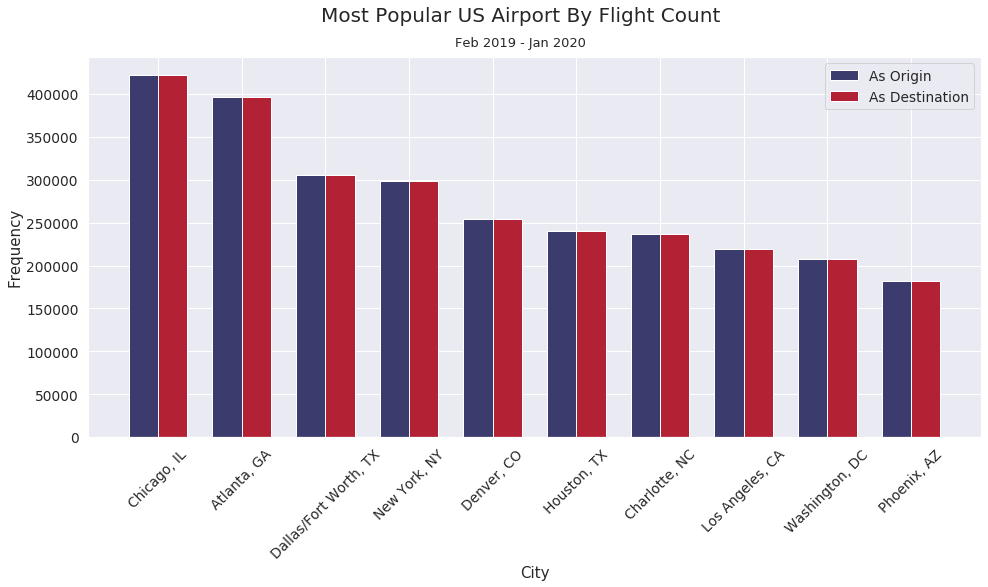

In [302]:
plot_top_10_by_state(df_one_year,'US','#3C3B6E','#B22234')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020',fontsize=13,ha='center')

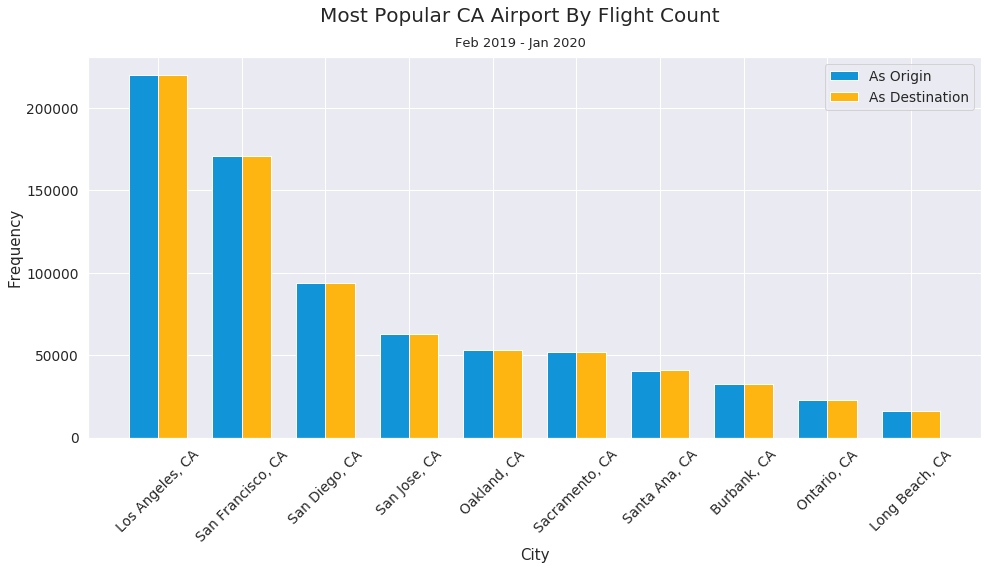

In [316]:
state_abr = 'CA'
colorhex1 = '#1295D8'
colorhex2 =  '#FFB511'

fig, ax = plt.subplots(figsize=(16,7))
index = np.arange(0,10)
bar_width = 0.35
most_popular_index = df_one_year[(df_one_year['ORIGIN_STATE_ABR'] == state_abr)]['ORIGIN_CITY_NAME'].value_counts().head(10).index
height1 = df_one_year[(df_one_year['ORIGIN_STATE_ABR'] == state_abr)]['ORIGIN_CITY_NAME'].value_counts().head(10)
height2 = df_one_year[(df_one_year['DEST_STATE_ABR'] == state_abr)]['DEST_CITY_NAME'].value_counts().head(10)
origin = ax.bar(index, height1, bar_width, color = colorhex1)
destination = ax.bar(index+bar_width, height2, bar_width, color = colorhex2)

origin.set_label('As Origin')
destination.set_label('As Destination')

ax.set_xlabel('City')
ax.set_xticklabels(most_popular_index)
ax.set_xticks(index + bar_width / 2)
ax.set_ylabel('Frequency')
ax.legend()
plt.xticks(rotation=45)
plt.figtext(.5,.95,f'Most Popular {state_abr} Airport By Flight Count', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020',fontsize=13,ha='center')
plt.savefig('../img/most_popular_airport_1.png', bbox_inches = "tight")

#### Cancellation

In [318]:
cancelled_flight = df_one_year.groupby(['ORIGIN_CITY_NAME','ORIGIN_STATE_ABR']).agg(
    total_flight=pd.NamedAgg(column='CANCELLED',aggfunc='count'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
    avg_dist=pd.NamedAgg(column='DISTANCE',aggfunc='mean')
)
cancelled_flight['cancelled_rate'] = cancelled_flight['cancelled_count'] / cancelled_flight['total_flight']
cancelled_flight = cancelled_flight.reset_index()

In [119]:
cancelled_flight

ORIGIN_CITY_NAME ORIGIN_STATE_ABR  total_flight  cancelled_count  \
0       Aberdeen, SD               SD           750             18.0   
1        Abilene, TX               TX          2270             41.0   
2    Adak Island, AK               AK           104              6.0   
3      Aguadilla, PR               PR          2303             22.0   
4          Akron, OH               OH          6261            155.0   
..               ...              ...           ...              ...   
349   Wilmington, NC               NC          6902            136.0   
350    Worcester, MA               MA          1265             22.0   
351     Wrangell, AK               AK           724             14.0   
352      Yakutat, AK               AK           722             24.0   
353         Yuma, AZ               AZ          1990              8.0   

        avg_dist  cancelled_rate  
0     257.000000        0.024000  
1     158.000000        0.018062  
2    1192.000000        0.057692  
3    1246.702128        0.009553  
4     471.334451        0.024756  
..           ...             ...  
349   358.443929        0.019704  
350   786.577075        0.017391  
351    56.500000        0.019337  
352   205.500000        0.033241  
353   319.405025        0.004020  

[354 rows x 6 columns]

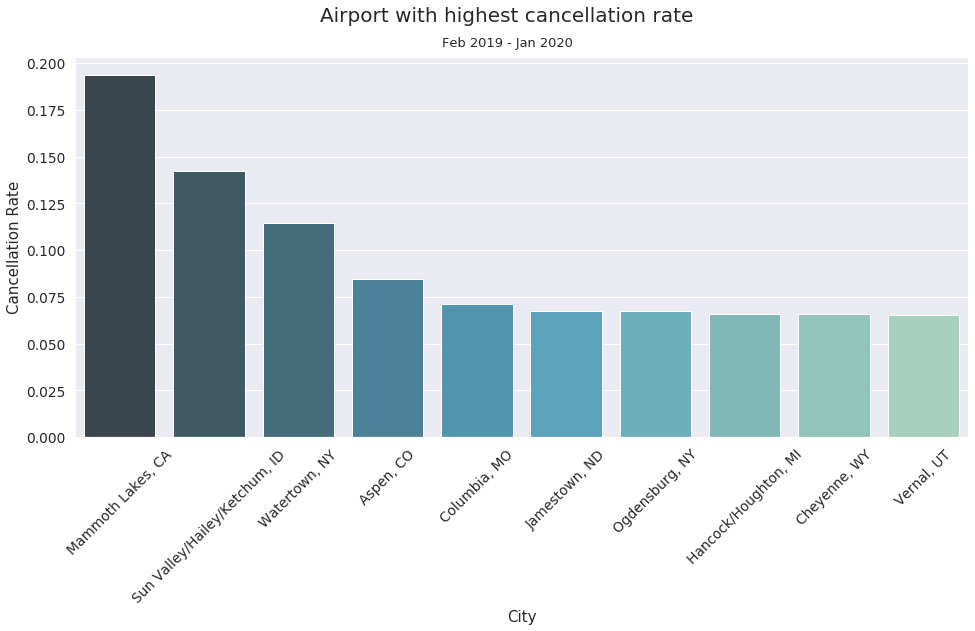

In [319]:
cancelled_flight_ = cancelled_flight.sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight_[0:10],palette='GnBu_d')
ax.set_xlabel('City')
ax.set_ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Airport with highest cancellation rate', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/highest_cancellation_rate_US.png', bbox_inches = "tight")

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

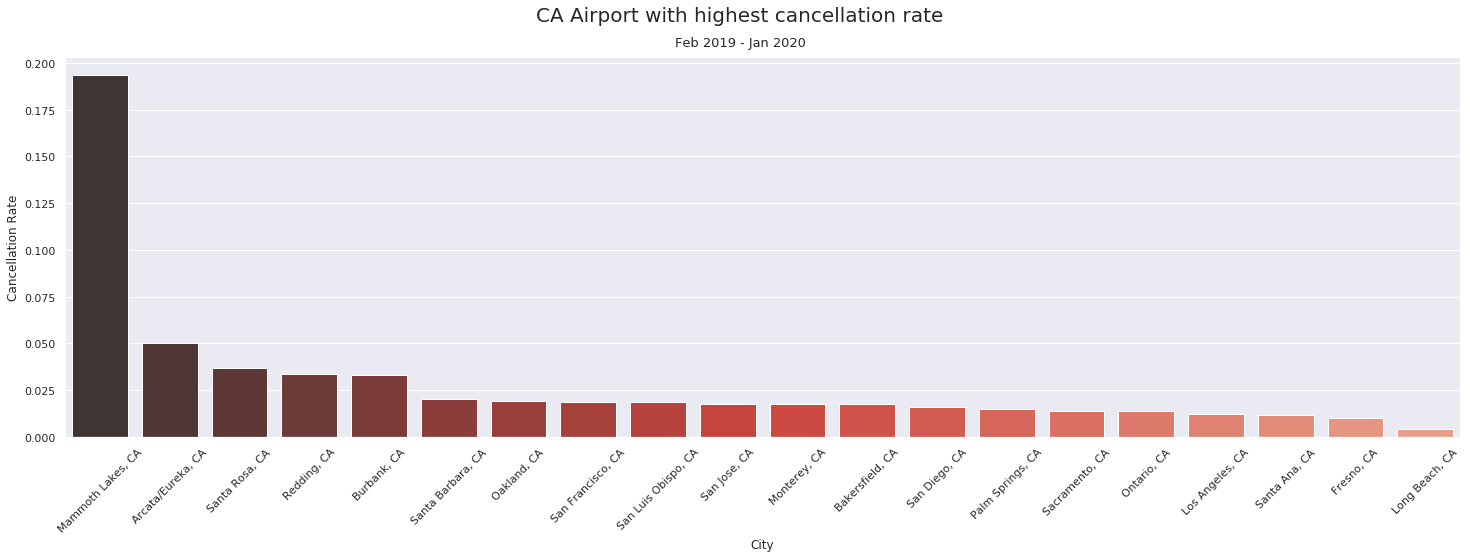

In [187]:
cancelled_flight_ = cancelled_flight[cancelled_flight['ORIGIN_STATE_ABR'] == "CA"].sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(25,7))
sns.set(font_scale=1.25)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight_[0:20],palette='Reds_d')
ax.set_xlabel('City')
ax.set_ylabel('Cancellation Rate')
plt.xticks(rotation=45,horizontalalignment='center')
plt.figtext(.5,.95,'CA Airport with highest cancellation rate', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
# fig.savefig('img/highest_cancellation_rate_CA.png')

In [92]:
cancelled_flight.describe()

total_flight  cancelled_count     avg_dist  cancelled_rate
count     354.000000       354.000000   354.000000      354.000000
mean    21032.197740       353.466102   524.572816        0.022190
std     53639.868509      1019.250144   308.196688        0.018668
min        37.000000         0.000000    41.000000        0.000000
25%       959.500000        23.000000   300.863924        0.012304
50%      3103.000000        56.000000   470.060843        0.018558
75%     12182.750000       219.000000   689.985623        0.027013
max    422539.000000     11362.000000  2599.000000        0.193662

In [320]:
cancelled_flight.corr()

total_flight  cancelled_count  avg_dist  cancelled_rate
total_flight         1.000000         0.907431  0.352114       -0.113411
cancelled_count      0.907431         1.000000  0.281797       -0.032271
avg_dist             0.352114         0.281797  1.000000       -0.261759
cancelled_rate      -0.113411        -0.032271 -0.261759        1.000000

In [94]:
busy_half = cancelled_flight[cancelled_flight['total_flight'] >= 3103]
inactive_half = cancelled_flight[cancelled_flight['total_flight'] < 3103]

In [95]:
busy_half.corr()

total_flight  cancelled_count  avg_dist  cancelled_rate
total_flight         1.000000         0.896917  0.414661       -0.074700
cancelled_count      0.896917         1.000000  0.314031        0.099161
avg_dist             0.414661         0.314031  1.000000       -0.414405
cancelled_rate      -0.074700         0.099161 -0.414405        1.000000

In [96]:
inactive_half.corr()

total_flight  cancelled_count  avg_dist  cancelled_rate
total_flight         1.000000         0.549305 -0.037571       -0.091385
cancelled_count      0.549305         1.000000 -0.129582        0.633602
avg_dist            -0.037571        -0.129582  1.000000       -0.139573
cancelled_rate      -0.091385         0.633602 -0.139573        1.000000

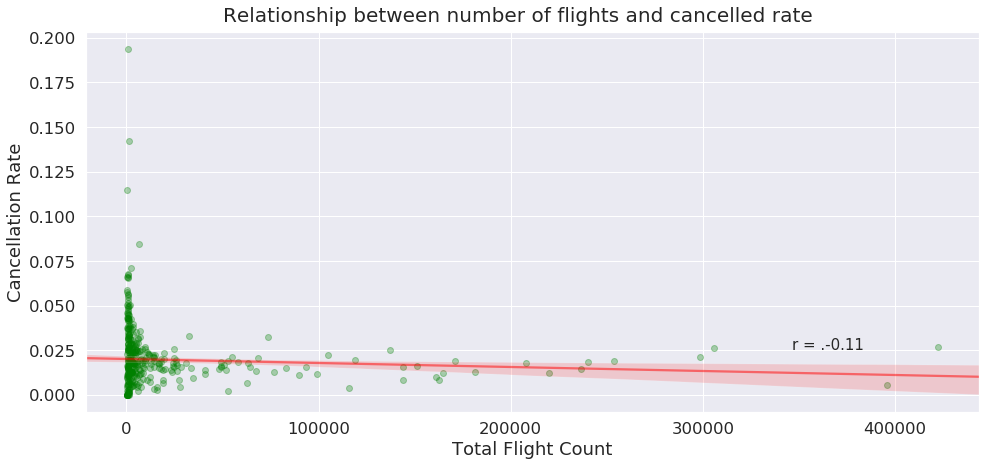

In [324]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='cancelled_rate',data=cancelled_flight,robust=True, scatter_kws = {'color': 'green', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Relationship between number of flights and cancelled rate', fontsize=20, ha='center')
plt.figtext(.8,.25,'r = .-0.11', fontsize=15, ha='right')
plt.savefig('../img/flight_count_cancel_rate_US.png', bbox_inches = "tight")

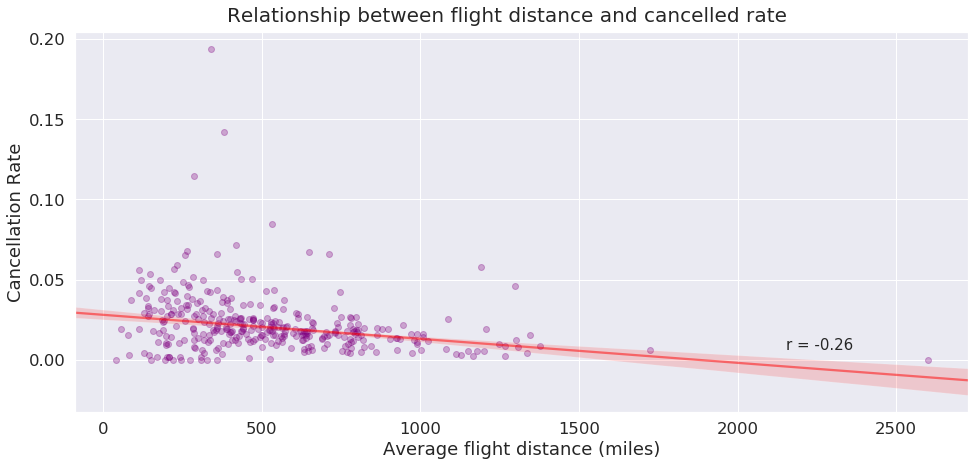

In [325]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='avg_dist',y='cancelled_rate',data=cancelled_flight,robust=True, scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Average flight distance (miles)')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Relationship between flight distance and cancelled rate', fontsize=20, ha='center')
plt.figtext(.8,.25,'r = -0.26', fontsize=15, ha='right')
plt.savefig('../img/flight_dist_cancel_rate_US.png', bbox_inches = "tight")

#### Delay

In [333]:
flight_delay = df_one_year.groupby(['ORIGIN_CITY_NAME']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    avg_dist=pd.NamedAgg(column='DISTANCE',aggfunc='mean'),
    med_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='median'),
    med_dist=pd.NamedAgg(column='DISTANCE',aggfunc='median')
).reset_index()

In [328]:
flight_delay.describe()

total_flight  avg_delay_min     avg_dist  med_delay_min     med_dist
count     354.000000     354.000000   354.000000     354.000000   354.000000
mean    20691.932203      10.304992   524.572816      -4.228814   468.631356
std     52756.857645       5.964073   308.196688       2.465895   298.705273
min        37.000000      -7.940666    41.000000     -15.000000    41.000000
25%       934.500000       7.581765   300.863924      -5.000000   241.000000
50%      3049.500000       9.988003   470.060843      -4.000000   430.000000
75%     12074.000000      13.066916   689.985623      -3.000000   620.000000
max    411619.000000      34.507003  2599.000000       8.000000  2599.000000

In [329]:
flight_delay.corr()

total_flight  avg_delay_min  avg_dist  med_delay_min  med_dist
total_flight       1.000000       0.021044  0.352785       0.320728  0.285561
avg_delay_min      0.021044       1.000000  0.030804       0.401604  0.135876
avg_dist           0.352785       0.030804  1.000000       0.428978  0.850164
med_delay_min      0.320728       0.401604  0.428978       1.000000  0.413663
med_dist           0.285561       0.135876  0.850164       0.413663  1.000000

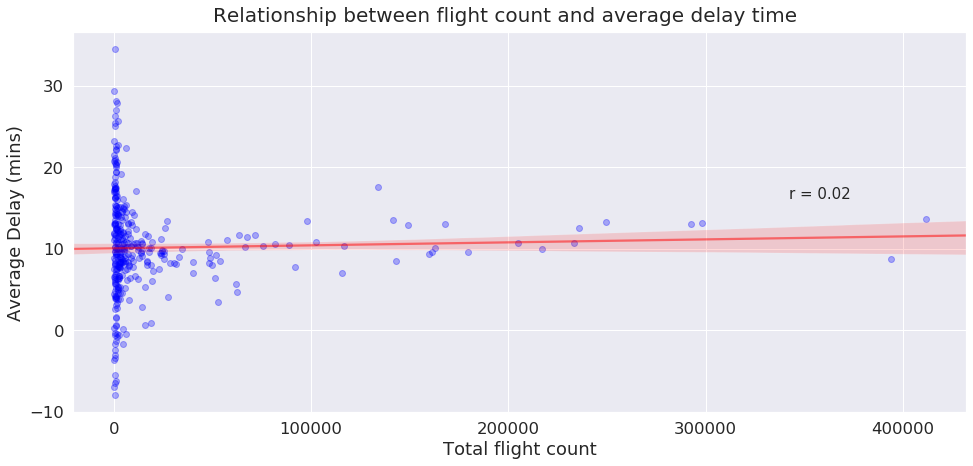

In [330]:
# Total flight vs Avg Delay
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='avg_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total flight count')
ax.set_ylabel('Average Delay (mins)')
plt.figtext(.5,.9,'Relationship between flight count and average delay time', fontsize=20, ha='center')
plt.figtext(.8,.55,'r = 0.02', fontsize=15, ha='right')
plt.savefig('../img/flight_count_avg_delay_corr.png', bbox_inches = "tight")

Text(0.8, 0.7, 'r = 0.32')

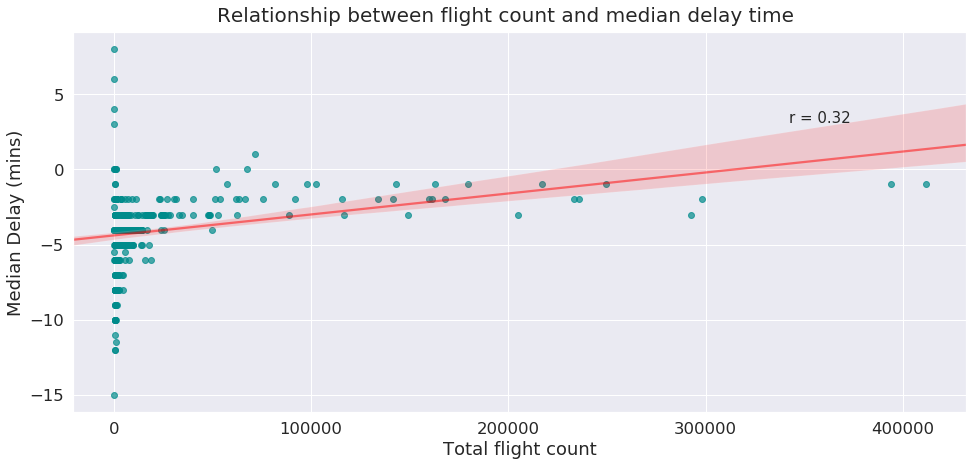

In [15]:
# Total flight vs Med Delay
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='med_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'darkcyan', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total flight count')
ax.set_ylabel('Median Delay (mins)')
plt.figtext(.5,.9,'Relationship between flight count and median delay time', fontsize=20, ha='center')
plt.figtext(.8,.7,'r = 0.32', fontsize=15, ha='right')
# fig.savefig('img/flight_count_med_delay_corr.png')

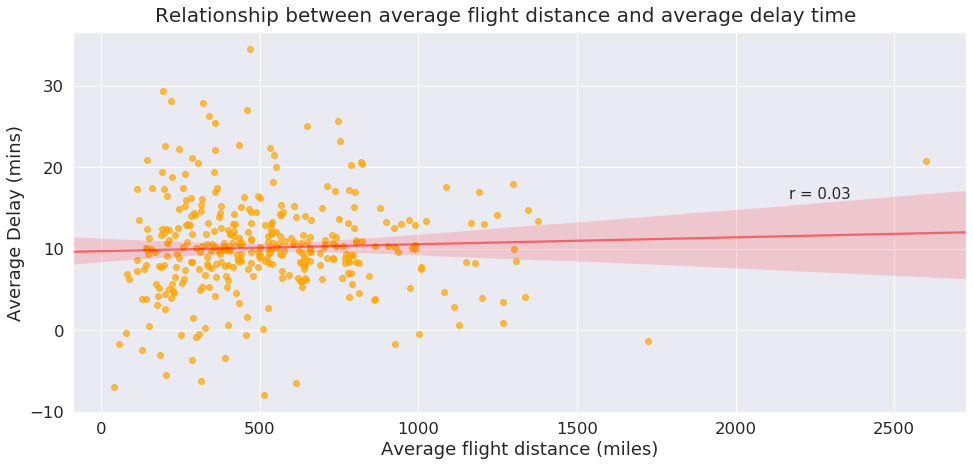

In [331]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='avg_dist',y='avg_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'orange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Average flight distance (miles)')
ax.set_ylabel('Average Delay (mins)')
plt.figtext(.5,.9,'Relationship between average flight distance and average delay time', fontsize=20, ha='center')
plt.figtext(.8,.55,'r = 0.03', fontsize=15, ha='right')
plt.savefig('../img/avg_flight_dist_avg_delay_corr.png', bbox_inches = "tight")

Text(0.8, 0.75, 'r = 0.41')

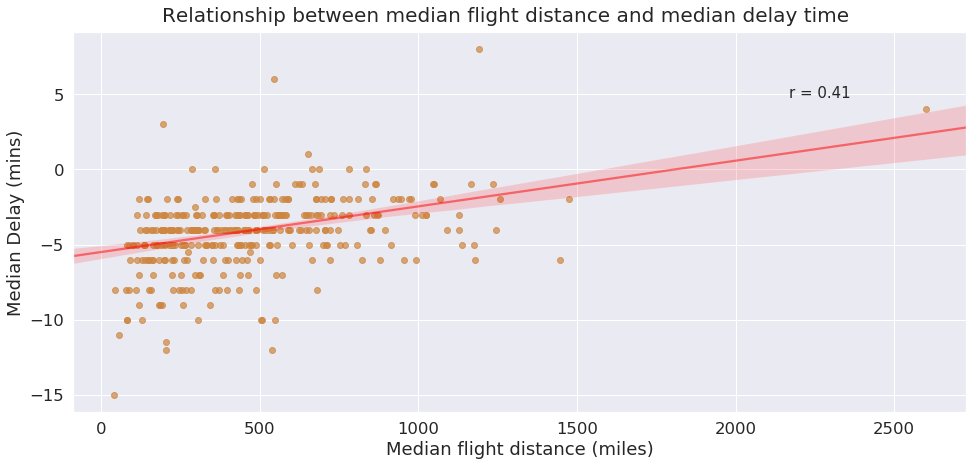

In [19]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='med_dist',y='med_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'peru', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Median flight distance (miles)')
ax.set_ylabel('Median Delay (mins)')
plt.figtext(.5,.9,'Relationship between median flight distance and median delay time', fontsize=20, ha='center')
plt.figtext(.8,.75,'r = 0.41', fontsize=15, ha='right')
# fig.savefig('img/avg_flight_dist_avg_delay_corr.png')

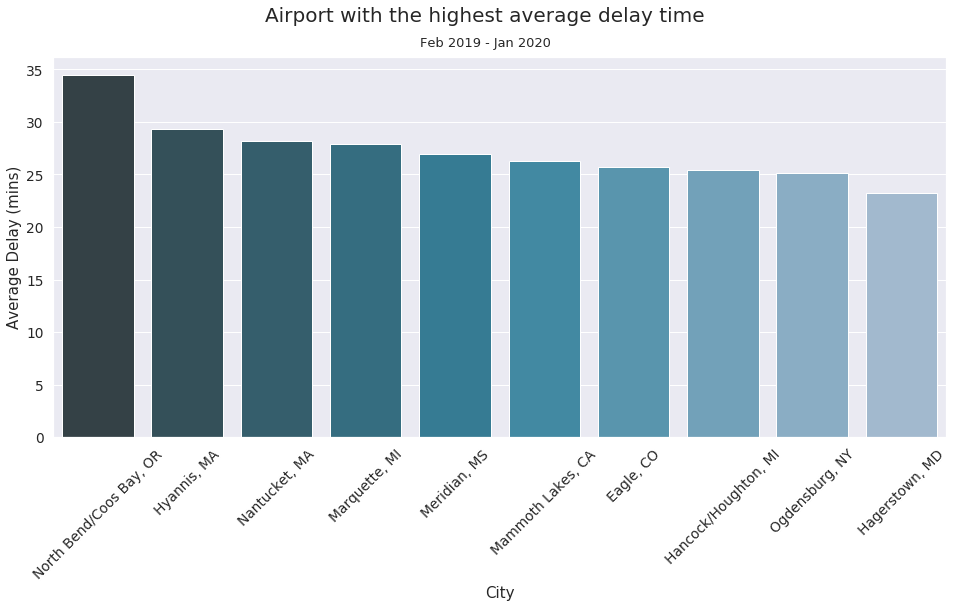

In [334]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay.sort_values(by='avg_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_[0:10],palette='PuBuGn_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Airport with the highest average delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/highest_avg_delay_US.png', bbox_inches = "tight")

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

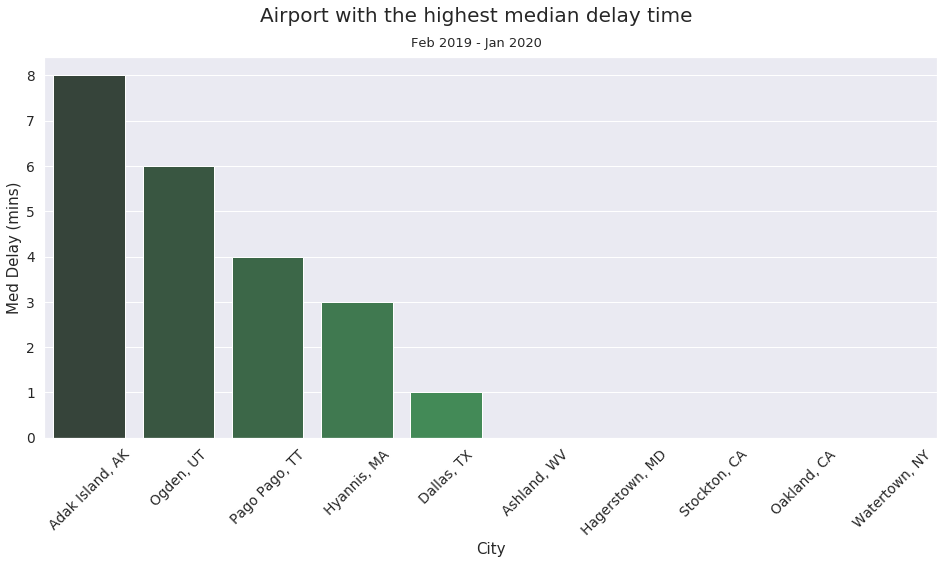

In [24]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay.sort_values(by='med_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='med_delay_min',data=flight_delay_[0:10],palette='Greens_d')

ax.set_xlabel('City')
ax.set_ylabel('Med Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Airport with the highest median delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

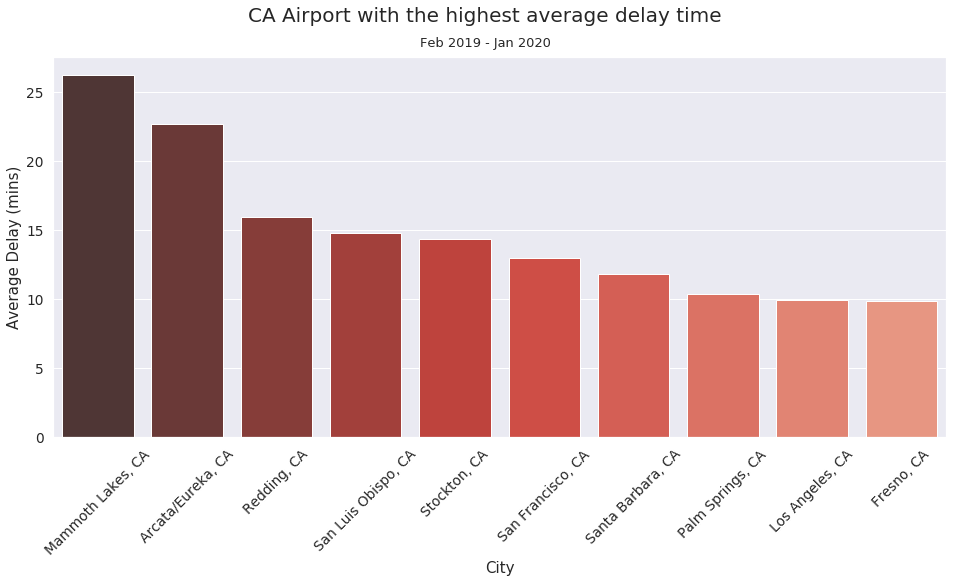

In [34]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_STATE_ABR'] == 'CA'].sort_values(by='avg_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_[0:10],palette='Reds_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'CA Airport with the highest average delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

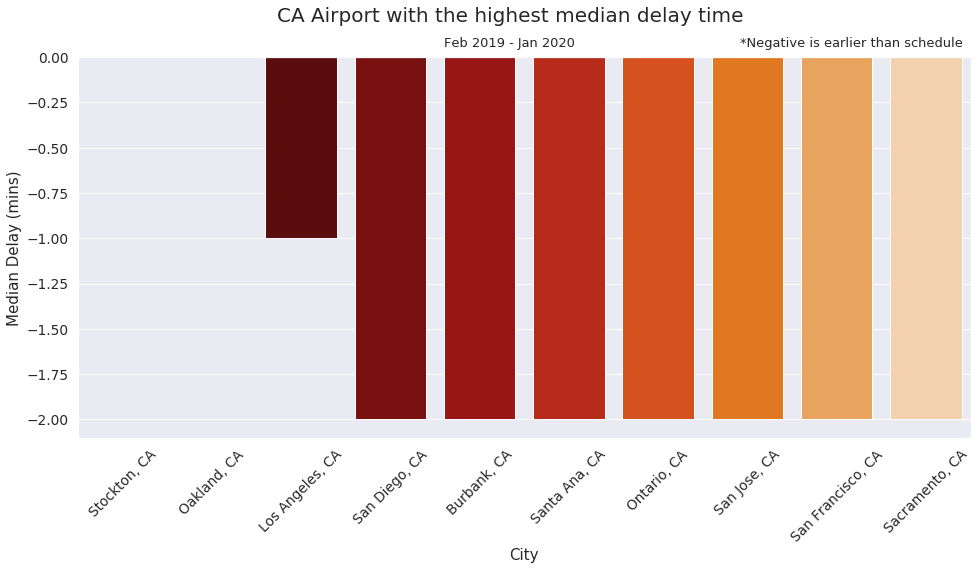

In [44]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_STATE_ABR'] == 'CA'].sort_values(by='med_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='med_delay_min',data=flight_delay_[0:10],palette='gist_heat')
ax.set_xlabel('City')
ax.set_ylabel('Median Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'CA Airport with the highest median delay time', fontsize=20, ha='center')
plt.figtext(.7,.9,'*Negative is earlier than schedule', fontsize=13, ha='left')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

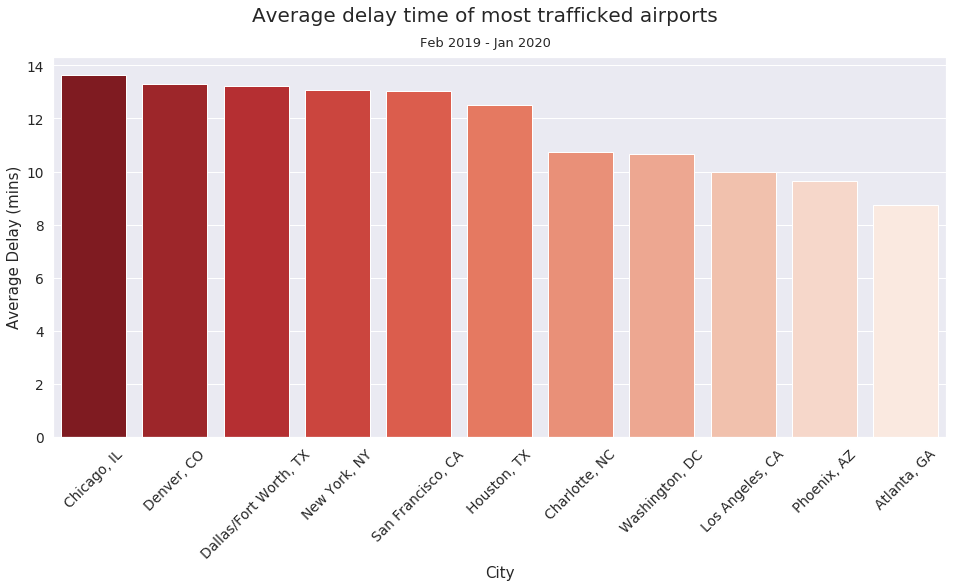

In [352]:
airport_list = [
'Chicago, IL',
'Atlanta, GA',
'Dallas/Fort Worth, TX',
'New York, NY',
'Denver, CO',
'Houston, TX',
'Charlotte, NC',
'Los Angeles, CA',
'Washington, DC',
'Phoenix, AZ',
'San Francisco, CA']

fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_CITY_NAME'].isin(airport_list)].sort_values('avg_delay_min',ascending=False)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_,palette='Reds_r')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Average delay time of most trafficked airports', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/avg_delay_high_traffic_US.png', bbox_inches = "tight")

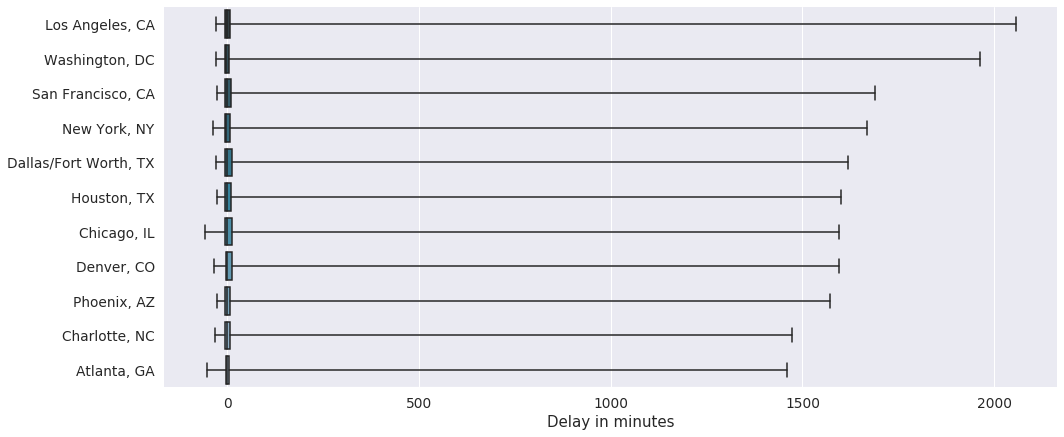

In [353]:
fig, ax = plt.subplots(figsize=(16,7))

flight_delay_all = df_one_year[(df_one_year['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_one_year['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values('DEP_DELAY',ascending=False)


sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=flight_delay_all,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

plt.savefig('../img/delay_dist_full_US.png', bbox_inches = "tight")

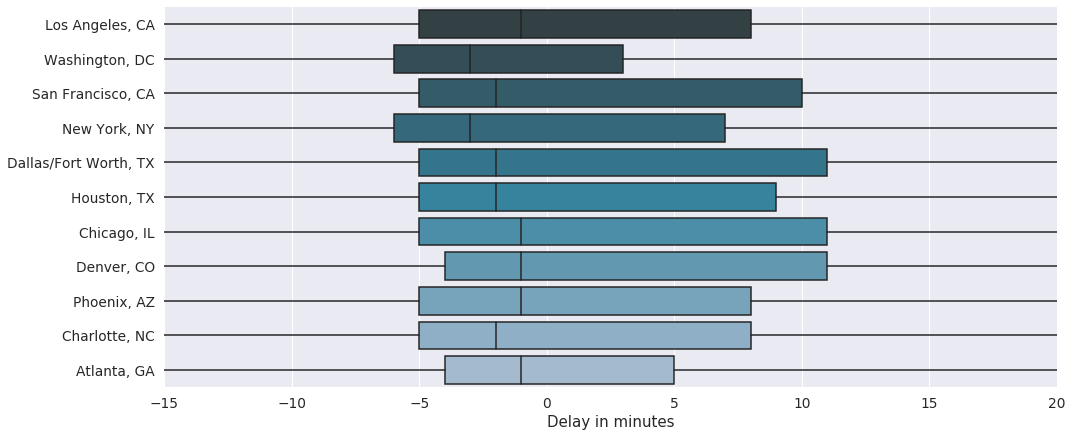

In [354]:
fig, ax = plt.subplots(figsize=(16,7))

flight_delay_all = df_one_year[(df_one_year['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_one_year['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values('DEP_DELAY',ascending=False)


sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=flight_delay_all,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
plt.xlim(-15,20)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

plt.savefig('../img/delay_dist_zoomed_US.png', bbox_inches = "tight")

# T-Test

In [349]:
SFO_N, OAK_N, SFO_avg, OAK_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'Oakland, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of OAK:{OAK_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of OAK:{OAK_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of OAK:51968
Average delay of SFO:13.01
Average delay of OAK:9.24
Co-variance:0.18
t score:20.64
Two tail p val:0.00
One tail p val:0.00


In [348]:
SFO_N, LAX_N, SFO_avg, LAX_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'Los Angeles, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of LAX:{LAX_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of LAX:{LAX_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of LAX:217173
Average delay of SFO:13.01
Average delay of LAX:9.97
Co-variance:0.15
t score:20.34
Two tail p val:0.00
One tail p val:0.00


In [347]:
SFO_N, SJC_N, SFO_avg, SJC_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'San Jose, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of SJC:{SJC_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of SJC:{SJC_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of SJC:61970
Average delay of SFO:13.01
Average delay of SJC:5.68
Co-variance:0.18
t score:40.13
Two tail p val:0.00
One tail p val:0.00


In [346]:
SFO_N, ex_SFO_N, SFO_avg, Others_avg, co_var, t_score, p_val = t_test_against_others(df_one_year,'San Francisco, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of other airports:{ex_SFO_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of other airports:{Others_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of other airports:7157191
Average delay of SFO:13.01
Average delay of other airports:10.57
Co-variance:0.12
t score:20.25
Two tail p val:0.00
One tail p val:0.00


In [344]:
a = df_one_year[(df_one_year['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (df_one_year['DEP_DELAY'].isnull() == False)]['DEP_DELAY']
b = df_one_year[(df_one_year['ORIGIN_CITY_NAME'] != 'San Francisco, CA') & (df_one_year['DEP_DELAY'].isnull() == False)]['DEP_DELAY']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=20.250138735764757, pvalue=4.5041974193408615e-91)

# Integrating Weather Data

In [7]:
df_weather = pd.read_csv('../data/19_02_20_01_SFO_DAILY.csv', usecols=['DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])

In [8]:
df_weather.columns = ["date", "avg_wind_spd", "precip", "avg_temp", "fog", "heavy_fog", "thunder", "smoke_haze"]

In [9]:
df_weather.fillna(value=0, inplace=True)

In [10]:
df_weather.head(5)

date  avg_wind_spd  precip  avg_temp  fog  heavy_fog  thunder  \
0 2019-02-01           4.4     3.3      12.9  0.0        0.0      0.0   
1 2019-02-02           8.2    17.3      12.6  1.0        0.0      0.0   
2 2019-02-03           6.0     3.6      11.4  1.0        0.0      0.0   
3 2019-02-04           7.3    15.7      10.5  1.0        0.0      0.0   
4 2019-02-05           4.3     2.5       7.0  0.0        0.0      0.0   

   smoke_haze  
0         0.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0

In [11]:
df_sfo = df_one_year[df_one_year['ORIGIN_CITY_NAME'] == "San Francisco, CA"]

In [12]:
df_sfo_pivot = df_sfo.groupby(['ORIGIN_CITY_NAME','FL_DATE']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
)
df_sfo_pivot = df_sfo_pivot.reset_index()
df_sfo_pivot['FL_DATE'] = pd.to_datetime(df_sfo_pivot['FL_DATE'])

In [70]:
df_sfo_pivot.sample(5)

ORIGIN_CITY_NAME    FL_DATE  total_flight  avg_delay_min  \
176  San Francisco, CA 2019-07-27           451       6.771619   
54   San Francisco, CA 2019-03-27           455      36.167033   
18   San Francisco, CA 2019-02-19           430       0.427907   
210  San Francisco, CA 2019-08-30           552      11.831522   
339  San Francisco, CA 2020-01-06           452       3.402655   

     cancelled_count  
176              2.0  
54              18.0  
18               9.0  
210              6.0  
339              5.0

In [13]:
df_combined = df_sfo_pivot.join(df_weather.set_index('date'),on='FL_DATE')

In [78]:
df_combined.head(5)

ORIGIN_CITY_NAME    FL_DATE  total_flight  avg_delay_min  cancelled_count  \
0  San Francisco, CA 2019-02-01           417      26.160671             43.0   
1  San Francisco, CA 2019-02-02           329      21.705167             29.0   
2  San Francisco, CA 2019-02-03           413      11.636804              6.0   
3  San Francisco, CA 2019-02-04           447      24.861298             15.0   
4  San Francisco, CA 2019-02-05           422       2.943128              6.0   

   avg_wind_spd  precip  avg_temp  fog  heavy_fog  thunder  smoke_haze  
0           4.4     3.3      12.9  0.0        0.0      0.0         0.0  
1           8.2    17.3      12.6  1.0        0.0      0.0         0.0  
2           6.0     3.6      11.4  1.0        0.0      0.0         1.0  
3           7.3    15.7      10.5  1.0        0.0      0.0         1.0  
4           4.3     2.5       7.0  0.0        0.0      0.0         1.0

In [14]:
df_combined['cancel_rate'] = df_combined['cancelled_count'] / df_combined['total_flight']

In [81]:
df_combined.corr()

total_flight  avg_delay_min  cancelled_count  avg_wind_spd  \
total_flight         1.000000      -0.168144        -0.352158      0.045596   
avg_delay_min       -0.168144       1.000000         0.751466      0.191894   
cancelled_count     -0.352158       0.751466         1.000000      0.259371   
avg_wind_spd         0.045596       0.191894         0.259371      1.000000   
precip              -0.321585       0.518425         0.498733      0.137547   
avg_temp             0.404968      -0.088188        -0.035567      0.193203   
fog                 -0.216687       0.225791         0.158836     -0.073424   
heavy_fog           -0.041207       0.095659        -0.007201     -0.204712   
thunder             -0.078504       0.326277         0.248912      0.072925   
smoke_haze           0.090710       0.108300         0.017758     -0.001433   
cancel_rate         -0.393657       0.721251         0.994510      0.262323   

                   precip  avg_temp       fog  heavy_fog   thunder  \
total_flight    -0.321585  0.404968 -0.216687  -0.041207 -0.078504   
avg_delay_min    0.518425 -0.088188  0.225791   0.095659  0.326277   
cancelled_count  0.498733 -0.035567  0.158836  -0.007201  0.248912   
avg_wind_spd     0.137547  0.193203 -0.073424  -0.204712  0.072925   
precip           1.000000 -0.234537  0.344332  -0.042706  0.434745   
avg_temp        -0.234537  1.000000 -0.320325  -0.089624 -0.141233   
fog              0.344332 -0.320325  1.000000   0.179342  0.121372   
heavy_fog       -0.042706 -0.089624  0.179342   1.000000 -0.018077   
thunder          0.434745 -0.141233  0.121372  -0.018077  1.000000   
smoke_haze       0.160806 -0.207294  0.522553   0.086149  0.073459   
cancel_rate      0.505795 -0.042442  0.155368  -0.009204  0.250235   

                 smoke_haze  cancel_rate  
total_flight       0.090710    -0.393657  
avg_delay_min      0.108300     0.721251  
cancelled_count    0.017758     0.994510  
avg_wind_spd      -0.001433     0.262323  
precip             0.160806     0.505795  
avg_temp          -0.207294    -0.042442  
fog                0.522553     0.155368  
heavy_fog          0.086149    -0.009204  
thunder            0.073459     0.250235  
smoke_haze         1.000000     0.008648  
cancel_rate        0.008648     1.000000

Text(0.5, 0.9, 'SFO - Cancellation Rate & Qualitative Weather Conditions')

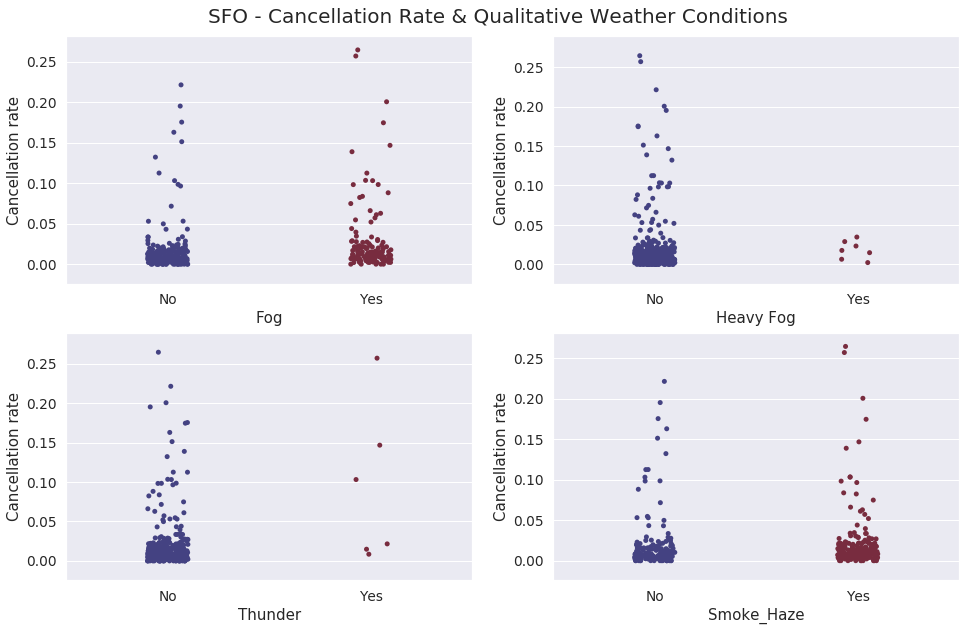

In [129]:
fig, axes = plt.subplots(2,2,figsize=(16,10))

sns.stripplot(x="fog",y="cancel_rate",data=df_combined,jitter=True,ax=axes[0, 0],palette='icefire')
sns.stripplot(x="heavy_fog",y="cancel_rate",data=df_combined,jitter=True,ax=axes[0, 1],palette='icefire')
sns.stripplot(x="thunder",y="cancel_rate",data=df_combined,jitter=True,ax=axes[1, 0],palette='icefire')
sns.stripplot(x="smoke_haze",y="cancel_rate",data=df_combined,jitter=True,ax=axes[1, 1],palette='icefire')

axes[0,0].set_xticklabels(['No', 'Yes'])
axes[0,0].set(xlabel="Fog",ylabel="Cancellation rate")
axes[0,1].set_xticklabels(['No', 'Yes'])
axes[0,1].set(xlabel="Heavy Fog",ylabel="Cancellation rate")
axes[1,0].set_xticklabels(['No', 'Yes'])
axes[1,0].set(xlabel="Thunder",ylabel="Cancellation rate")
axes[1,1].set_xticklabels(['No', 'Yes'])
axes[1,1].set(xlabel="Smoke_Haze",ylabel="Cancellation rate")
plt.figtext(.5,.90,'SFO - Cancellation Rate & Qualitative Weather Conditions', fontsize=20, ha='center')

# fig.savefig('img/qual_weather_cancel_corr.png')

Text(0.5, 0.9, 'SFO - Average Delay Time & Qualitative Weather Conditions')

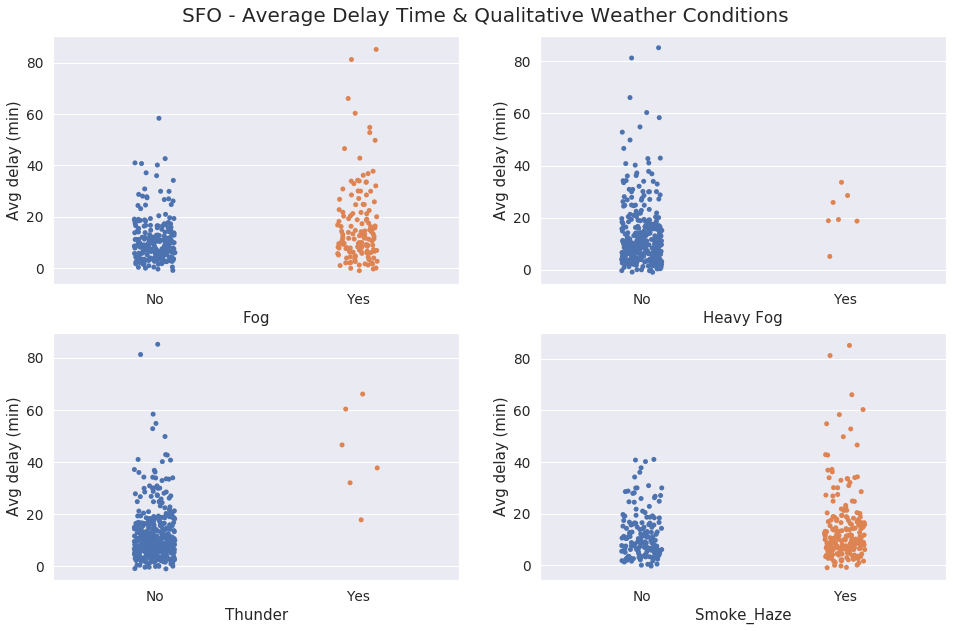

In [130]:
fig, axes = plt.subplots(2,2,figsize=(16,10))

sns.stripplot(x="fog",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[0, 0])
sns.stripplot(x="heavy_fog",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[0, 1])
sns.stripplot(x="thunder",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[1, 0])
sns.stripplot(x="smoke_haze",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[1, 1])

axes[0,0].set_xticklabels(['No', 'Yes'])
axes[0,0].set(xlabel="Fog",ylabel="Avg delay (min)")
axes[0,1].set_xticklabels(['No', 'Yes'])
axes[0,1].set(xlabel="Heavy Fog",ylabel="Avg delay (min)")
axes[1,0].set_xticklabels(['No', 'Yes'])
axes[1,0].set(xlabel="Thunder",ylabel="Avg delay (min)")
axes[1,1].set_xticklabels(['No', 'Yes'])
axes[1,1].set(xlabel="Smoke_Haze",ylabel="Avg delay (min)")
plt.figtext(.5,.90,'SFO - Average Delay Time & Qualitative Weather Conditions', fontsize=20, ha='center')

# fig.savefig('img/qual_weather_avg_delay_corr.png')

Text(0.8, 0.3, 'r=0.51')

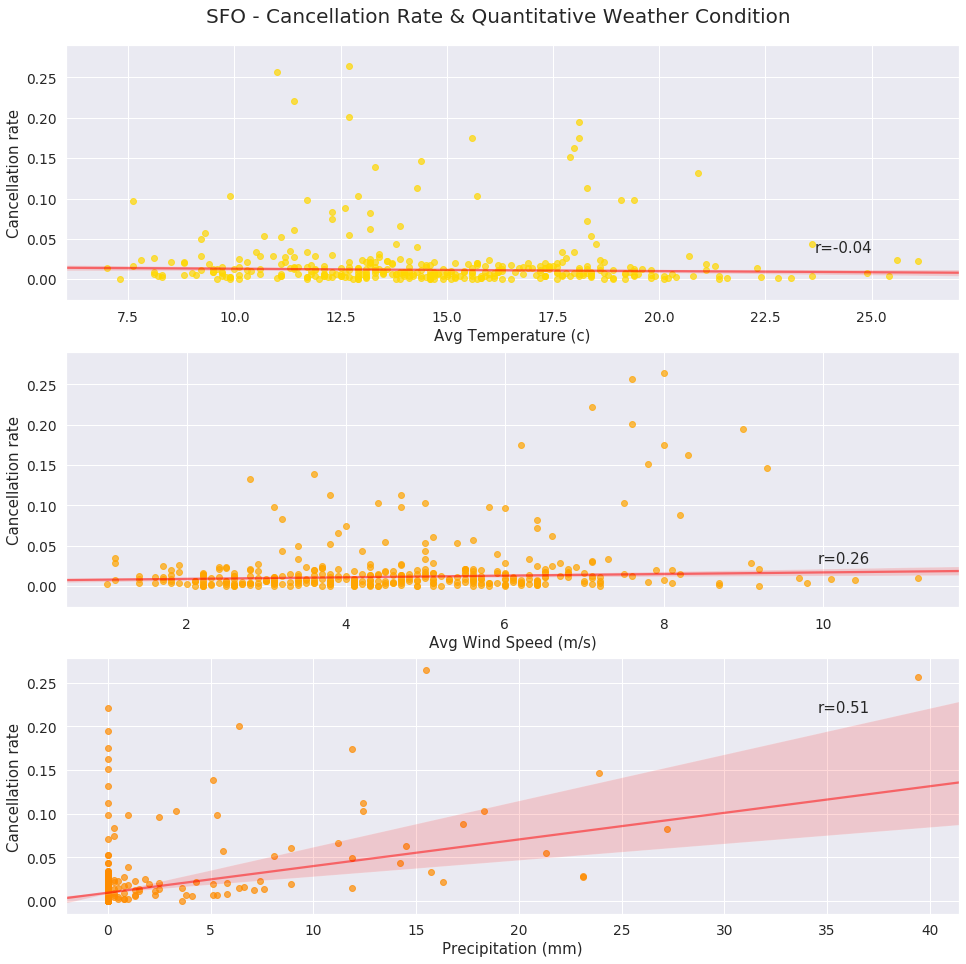

In [133]:
fig, axes = plt.subplots(3,1,figsize=(16,16))

sns.regplot(x='avg_temp',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'gold', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[0])
sns.regplot(x='avg_wind_spd',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'orange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[1])
sns.regplot(x='precip',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'darkorange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[2])

axes[0].set(xlabel="Avg Temperature (c)",ylabel="Cancellation rate")
axes[1].set(xlabel="Avg Wind Speed (m/s)",ylabel="Cancellation rate")
axes[2].set(xlabel="Precipitation (mm)",ylabel="Cancellation rate")

plt.figtext(.5,.9,'SFO - Cancellation Rate & Quantitative Weather Condition', fontsize=20, ha='center')
plt.figtext(.8,.7,'r=-0.04', fontsize=15, ha='center')
plt.figtext(.8,.43,'r=0.26', fontsize=15, ha='center')
plt.figtext(.8,.3,'r=0.51', fontsize=15, ha='center')

# fig.savefig('img/quan_weather_cancel_corr.png')

Text(0.8, 0.32, 'r=.52')

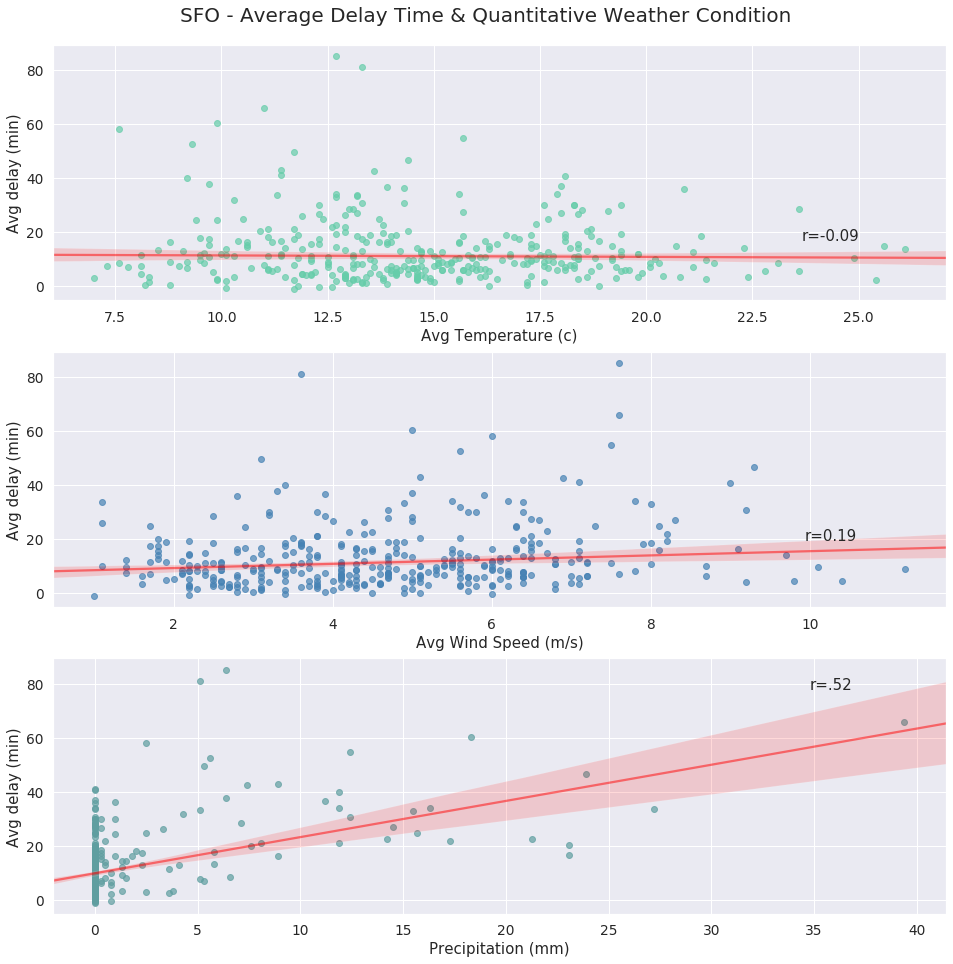

In [134]:
fig, axes = plt.subplots(3,1,figsize=(16,16))

sns.regplot(x='avg_temp',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'mediumaquamarine', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[0])
sns.regplot(x='avg_wind_spd',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'steelblue', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[1])
sns.regplot(x='precip',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'cadetblue', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[2])

axes[0].set(xlabel="Avg Temperature (c)",ylabel="Avg delay (min)")
axes[1].set(xlabel="Avg Wind Speed (m/s)",ylabel="Avg delay (min)")
axes[2].set(xlabel="Precipitation (mm)",ylabel="Avg delay (min)")

plt.figtext(.5,.9,'SFO - Average Delay Time & Quantitative Weather Condition', fontsize=20, ha='center')
plt.figtext(.8,.71,'r=-0.09', fontsize=15, ha='center')
plt.figtext(.8,.45,'r=0.19', fontsize=15, ha='center')
plt.figtext(.8,.32,'r=.52', fontsize=15, ha='center')

# fig.savefig('img/quan_weather_avg_delay_corr.png')

#### t-test - fog focus

In [33]:
a = df_combined[df_combined['fog'] == 1]['avg_delay_min']
b = df_combined[df_combined['fog'] == 0]['avg_delay_min']
t_stat, p_val = scs.ttest_ind(a,b,equal_var=False)
print(t_stat,p_val)

3.9133026678308456 0.00012580596426529727


In [35]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(df_combined,'fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 227
16.67798694165874 11.102852222334388
1.4246622846616341
3.9133026678308407 6.290298213264961e-05


In [36]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(df_combined,'fog','cancel_rate')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 227
0.028051475714197926 0.016262655040825604
0.00428600905834753
2.750535641172326 0.0032251920146964186


In [37]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(df_combined,'smoke_haze','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

201 164
14.381992181107 11.77517819522138
1.2065631572323254
2.160528415160014 0.015706469058247283


In [38]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(df_combined,'smoke_haze','cancel_rate')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

201 164
0.02100719768555948 0.02036755858554433
0.003879003183115095
0.16489780230122872 0.4345598747195719


# Runway Data

In [78]:
df_runway = pd.read_csv('../data/CA_runway_data.csv', usecols=['SiteNumber','State','RunwayID','RunwayLength','RunwayWidth'])

In [79]:
df_runway.head(5)

SiteNumber State RunwayID  RunwayLength  RunwayWidth
0  01213.01*H    CA      'H1            20           20
1    01216.*A    CA   '07/25          3360          100
2    01216.*A    CA   '16/34          2040          100
3   01216.1*A    CA   '07/25          5875           80
4  01216.15*H    CA      'H1            70           70

In [80]:
ca_five_code = ['01818.*A','01971.*A','02187.*A','02170.*A','02204.*A'] 
ca_five = df_runway[(df_runway['SiteNumber'].isin(ca_five_code)) & (df_runway['RunwayLength'] > 0) ]
ca_five

SiteNumber State  RunwayID  RunwayLength  RunwayWidth
546   01818.*A    CA  '06L/24R          8926          150
547   01818.*A    CA  '06R/24L         10885          150
548   01818.*A    CA  '07L/25R         12923          150
549   01818.*A    CA  '07R/25L         11095          200
641   01971.*A    CA  '10L/28R          5458          150
642   01971.*A    CA  '10R/28L          6213          150
643   01971.*A    CA    '12/30         10520          150
644   01971.*A    CA    '15/33          3376           75
836   02170.*A    CA    '09/27          9400          200
851   02187.*A    CA  '01L/19R          7650          200
852   02187.*A    CA  '01R/19L          8650          200
853   02187.*A    CA  '10L/28R         11870          200
854   02187.*A    CA  '10R/28L         11381          200
864   02204.*A    CA  '12L/30R         11000          150
865   02204.*A    CA  '12R/30L         11000          150

In [81]:
ca_five_pivot_runway = ca_five.groupby(['SiteNumber']).agg(
    total_runway=pd.NamedAgg(column='RunwayID',aggfunc='count'),
    avg_length=pd.NamedAgg(column='RunwayLength',aggfunc='mean'),
    avg_width=pd.NamedAgg(column='RunwayWidth',aggfunc='mean')
).reset_index()
ca_five_pivot_runway

SiteNumber  total_runway  avg_length  avg_width
0   01818.*A             4    10957.25     162.50
1   01971.*A             4     6391.75     131.25
2   02170.*A             1     9400.00     200.00
3   02187.*A             4     9887.75     200.00
4   02204.*A             2    11000.00     150.00

In [82]:
ca_five_dict = {'01818.*A':'Los Angeles, CA','01971.*A':'Oakland, CA','02187.*A': 'San Francisco, CA','02170.*A': 'San Diego, CA','02204.*A': 'San Jose, CA'}
ca_five_pivot_runway.replace(to_replace={'SiteNumber': {'01818.*A':'Los Angeles, CA','01971.*A':'Oakland, CA','02187.*A': 'San Francisco, CA','02170.*A': 'San Diego, CA','02204.*A': 'San Jose, CA'}}, inplace=True)

In [83]:
ca_five_pivot_runway

SiteNumber  total_runway  avg_length  avg_width
0    Los Angeles, CA             4    10957.25     162.50
1        Oakland, CA             4     6391.75     131.25
2      San Diego, CA             1     9400.00     200.00
3  San Francisco, CA             4     9887.75     200.00
4       San Jose, CA             2    11000.00     150.00

In [84]:
ca_five_list = ['Los Angeles, CA','Oakland, CA','San Francisco, CA','San Diego, CA','San Jose, CA']
ca_five_filtered = df_one_year[df_one_year['ORIGIN_CITY_NAME'].isin(ca_five_list)]
df_one_year[df_one_year['ORIGIN_CITY_NAME'].isin(ca_five_list)]['ORIGIN_CITY_NAME'].unique()

array(['Los Angeles, CA', 'San Francisco, CA', 'San Jose, CA',
       'San Diego, CA', 'Oakland, CA'], dtype=object)

In [85]:
ca_five_pivot_flight = ca_five_filtered.groupby(['ORIGIN_CITY_NAME']).agg(
    total_flight=pd.NamedAgg(column='ORIGIN_CITY_NAME',aggfunc='count')
).sort_values(by='total_flight',ascending=False).reset_index()

In [86]:
ca_five_pivot_flight

ORIGIN_CITY_NAME  total_flight
0    Los Angeles, CA        219763
1  San Francisco, CA        170913
2      San Diego, CA         93454
3       San Jose, CA         63088
4        Oakland, CA         52979

In [87]:
ca_five_combine = ca_five_pivot_flight.join(ca_five_pivot_runway.set_index('SiteNumber'),on='ORIGIN_CITY_NAME')

In [88]:
ca_five_combine

ORIGIN_CITY_NAME  total_flight  total_runway  avg_length  avg_width
0    Los Angeles, CA        219763             4    10957.25     162.50
1  San Francisco, CA        170913             4     9887.75     200.00
2      San Diego, CA         93454             1     9400.00     200.00
3       San Jose, CA         63088             2    11000.00     150.00
4        Oakland, CA         52979             4     6391.75     131.25

In [89]:
ca_five_combine['fl_per_day'] = ca_five_combine['total_flight'] / 365
ca_five_combine['fl_per_rw'] = ca_five_combine['total_flight'] / ca_five_combine['total_runway']
ca_five_combine['fl_per_rw_per_day'] = ca_five_combine['total_flight'] / ca_five_combine['total_runway'] / 365

In [90]:
ca_five_combine

ORIGIN_CITY_NAME  total_flight  total_runway  avg_length  avg_width  \
0    Los Angeles, CA        219763             4    10957.25     162.50   
1  San Francisco, CA        170913             4     9887.75     200.00   
2      San Diego, CA         93454             1     9400.00     200.00   
3       San Jose, CA         63088             2    11000.00     150.00   
4        Oakland, CA         52979             4     6391.75     131.25   

   fl_per_day  fl_per_rw  fl_per_rw_per_day  
0  602.090411   54940.75         150.522603  
1  468.254795   42728.25         117.063699  
2  256.038356   93454.00         256.038356  
3  172.843836   31544.00          86.421918  
4  145.147945   13244.75          36.286986

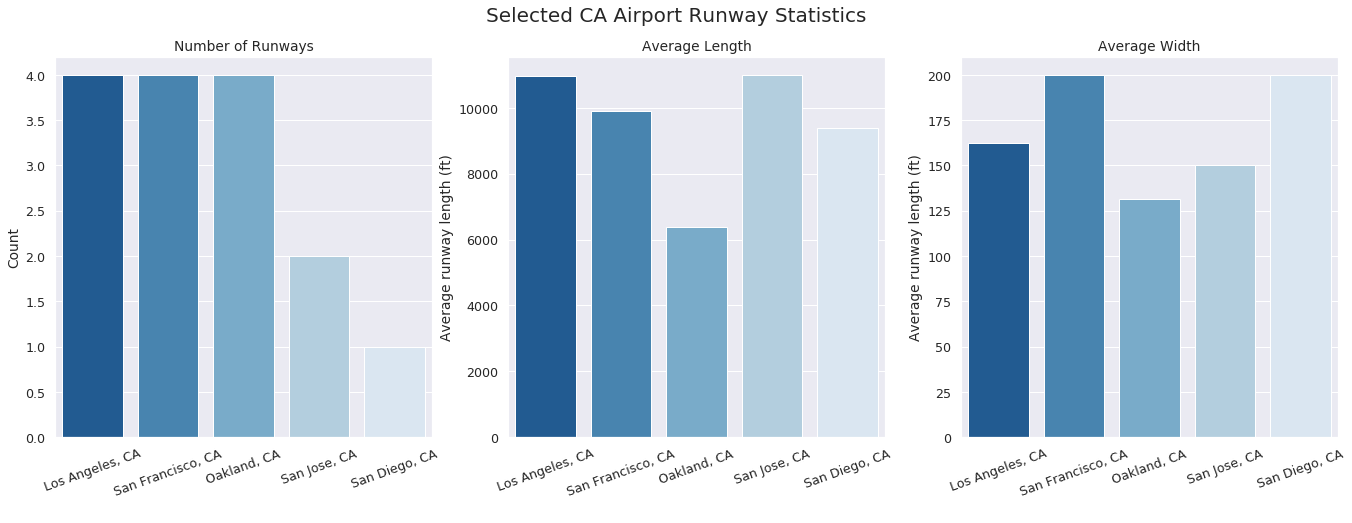

In [358]:
fig, axes = plt.subplots(1,3,figsize=(23,7))
sns.set(font_scale=1.15)

sns.barplot(x='ORIGIN_CITY_NAME',y='total_runway',data=ca_five_combine.sort_values('total_runway',ascending=False),palette='Blues_r',ax=axes[0])
sns.barplot(x='ORIGIN_CITY_NAME',y='avg_length',data=ca_five_combine.sort_values('total_runway',ascending=False),palette='Blues_r',ax=axes[1])
sns.barplot(x='ORIGIN_CITY_NAME',y='avg_width',data=ca_five_combine.sort_values('total_runway',ascending=False),palette='Blues_r',ax=axes[2])

axes[0].set_ylabel('Count')
axes[0].set_title('Number of Runways')
axes[1].set_ylabel('Average runway length (ft)')
axes[1].set_title('Average Length')
axes[2].set_ylabel('Average runway length (ft)')
axes[2].set_title('Average Width')
for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
plt.figtext(.5,.95,'Selected CA Airport Runway Statistics', fontsize=20, ha='center')
plt.savefig('../img/runway_ca_1.png', bbox_inches = "tight")

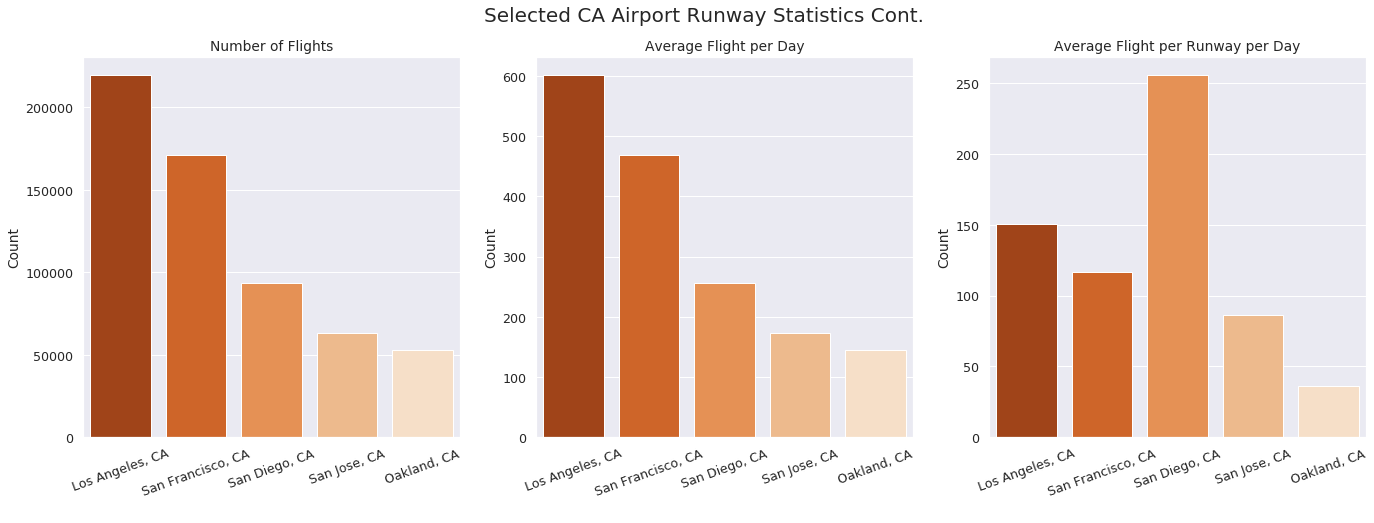

In [359]:
fig, axes = plt.subplots(1,3,figsize=(23,7))
sns.set(font_scale=1.15)

sns.barplot(x='ORIGIN_CITY_NAME',y='total_flight',data=ca_five_combine.sort_values('total_flight',ascending=False),palette='Oranges_r',ax=axes[0])
sns.barplot(x='ORIGIN_CITY_NAME',y='fl_per_day',data=ca_five_combine.sort_values('total_flight',ascending=False),palette='Oranges_r',ax=axes[1])
sns.barplot(x='ORIGIN_CITY_NAME',y='fl_per_rw_per_day',data=ca_five_combine.sort_values('total_flight',ascending=False),palette='Oranges_r',ax=axes[2])

axes[0].set_ylabel('Count')
axes[0].set_title('Number of Flights')
axes[1].set_ylabel('Count')
axes[1].set_title('Average Flight per Day')
axes[2].set_ylabel('Count')
axes[2].set_title('Average Flight per Runway per Day')
for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
plt.figtext(.5,.95,'Selected CA Airport Runway Statistics Cont.', fontsize=20, ha='center')
plt.savefig('../img/runway_ca_2.png', bbox_inches = "tight")

# More Weather

In [9]:
sfo_weather = pd.read_csv('../data/19_02_20_01_SFO_DAILY.csv', usecols=['NAME','DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])
other_ca_weather = pd.read_csv('../data/19_02_20_01_LA_OAK_SJ_SD_DAILY.csv', usecols=['NAME','DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])

In [10]:
sfo_weather.head()

NAME       DATE  AWND  PRCP  TAVG  \
0  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-01   4.4   3.3  12.9   
1  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-02   8.2  17.3  12.6   
2  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-03   6.0   3.6  11.4   
3  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-04   7.3  15.7  10.5   
4  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-05   4.3   2.5   7.0   

   WT01  WT02  WT03  WT08  
0   NaN   NaN   NaN   NaN  
1   1.0   NaN   NaN   NaN  
2   1.0   NaN   NaN   1.0  
3   1.0   NaN   NaN   1.0  
4   NaN   NaN   NaN   1.0

In [11]:
other_ca_weather.head()

NAME       DATE   AWND  PRCP  TAVG  WT01  WT02  \
0  OAKLAND METROPOLITAN, CA US 2019-02-01  13.42  0.14   NaN   NaN   NaN   
1  OAKLAND METROPOLITAN, CA US 2019-02-02  21.03  0.44   NaN   1.0   NaN   
2  OAKLAND METROPOLITAN, CA US 2019-02-03  15.21  0.04   NaN   1.0   NaN   
3  OAKLAND METROPOLITAN, CA US 2019-02-04  18.12  0.54   NaN   1.0   NaN   
4  OAKLAND METROPOLITAN, CA US 2019-02-05   7.16  0.10   NaN   NaN   NaN   

   WT03  WT08  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   1.0  
3   1.0   1.0  
4   NaN   NaN

In [12]:
ca_five_weather_df = sfo_weather.append(other_ca_weather)

In [14]:
ca_five_weather_df.columns = ["city","date", "avg_wind_spd", "precip", "avg_temp", "fog", "heavy_fog", "thunder", "smoke_haze"]

In [15]:
ca_five_weather_df.head()

city       date  avg_wind_spd  \
0  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-01           4.4   
1  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-02           8.2   
2  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-03           6.0   
3  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-04           7.3   
4  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US 2019-02-05           4.3   

   precip  avg_temp  fog  heavy_fog  thunder  smoke_haze  
0     3.3      12.9  NaN        NaN      NaN         NaN  
1    17.3      12.6  1.0        NaN      NaN         NaN  
2     3.6      11.4  1.0        NaN      NaN         1.0  
3    15.7      10.5  1.0        NaN      NaN         1.0  
4     2.5       7.0  NaN        NaN      NaN         1.0

In [16]:
ca_five_weather_df.fillna(value=0, inplace=True)

In [17]:
ca_five_weather_df['city'].unique()

array(['SAN FRANCISCO INTERNATIONAL AIRPORT, CA US',
       'OAKLAND METROPOLITAN, CA US',
       'LOS ANGELES INTERNATIONAL AIRPORT, CA US',
       'SAN DIEGO INTERNATIONAL AIRPORT, CA US', 'SAN JOSE, CA US'],
      dtype=object)

In [19]:
ca_five_weather_dict = {'LOS ANGELES INTERNATIONAL AIRPORT, CA US':'Los Angeles, CA','OAKLAND METROPOLITAN, CA US':'Oakland, CA','SAN FRANCISCO INTERNATIONAL AIRPORT, CA US': 'San Francisco, CA','SAN DIEGO INTERNATIONAL AIRPORT, CA US': 'San Diego, CA','SAN JOSE, CA US': 'San Jose, CA'}
ca_five_weather_df.replace(to_replace={'city': ca_five_weather_dict}, inplace=True)
ca_five_weather_df.sample(5)

city       date  avg_wind_spd  precip  avg_temp  fog  \
47    San Francisco, CA 2019-03-20          4.20   14.20      13.8  1.0   
1090      San Diego, CA 2020-01-28          4.03    0.00      60.0  1.0   
145   San Francisco, CA 2019-06-26          6.50    0.00      16.5  0.0   
52    San Francisco, CA 2019-03-25          3.90   11.20      13.9  1.0   
391     Los Angeles, CA 2019-02-28          8.05    0.06      58.0  1.0   

      heavy_fog  thunder  smoke_haze  
47          0.0      0.0         1.0  
1090        0.0      0.0         0.0  
145         0.0      0.0         0.0  
52          0.0      0.0         1.0  
391         0.0      0.0         1.0

In [23]:
ca_five_list = ['Los Angeles, CA','Oakland, CA','San Francisco, CA','San Diego, CA','San Jose, CA']
ca_five_filtered = df_one_year[df_one_year['ORIGIN_CITY_NAME'].isin(ca_five_list)]

In [24]:
ca_five_pivot = ca_five_filtered.groupby(['ORIGIN_CITY_NAME','FL_DATE']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
).reset_index()
ca_five_pivot['FL_DATE'] = pd.to_datetime(ca_five_pivot['FL_DATE'])

In [26]:
ca_five_pivot['cancel_rate'] = ca_five_pivot['cancelled_count'] / ca_five_pivot['total_flight']

In [33]:
ca_five_flight_weather = pd.merge(ca_five_pivot,ca_five_weather_df,left_on=['ORIGIN_CITY_NAME','FL_DATE'],right_on=['city','date'],validate='1:1')

In [39]:
ca_five_flight_weather.sample(5)

ORIGIN_CITY_NAME    FL_DATE  total_flight  avg_delay_min  \
1630       San Jose, CA 2019-07-22           192       4.505208   
1624       San Jose, CA 2019-07-16           197       1.208122   
805       San Diego, CA 2019-04-18           264       7.348485   
1254  San Francisco, CA 2019-07-11           513      12.516569   
963       San Diego, CA 2019-09-23           266       5.462406   

      cancelled_count  cancel_rate               city       date  \
1630              5.0     0.026042       San Jose, CA 2019-07-22   
1624              0.0     0.000000       San Jose, CA 2019-07-16   
805               5.0     0.018939      San Diego, CA 2019-04-18   
1254             11.0     0.021442  San Francisco, CA 2019-07-11   
963               2.0     0.007519      San Diego, CA 2019-09-23   

      avg_wind_spd  precip  avg_temp  fog  heavy_fog  thunder  smoke_haze  
1630          6.04     0.0       0.0  0.0        0.0      0.0         0.0  
1624          6.93     0.0       0.0  0.0        0.0      0.0         0.0  
805           6.04     0.0      66.0  0.0        0.0      0.0         0.0  
1254          6.80     0.0      17.7  0.0        0.0      0.0         0.0  
963           4.47     0.0      72.0  0.0        0.0      0.0         0.0

In [47]:
ca_five_flight_weather_pivot = ca_five_flight_weather.groupby(['ORIGIN_CITY_NAME']).agg(
    total_flight_year = pd.NamedAgg(column='total_flight',aggfunc='sum'),
    fog_count = pd.NamedAgg(column='fog',aggfunc='sum'),
    heavy_fog_count = pd.NamedAgg(column='heavy_fog',aggfunc='sum'),
    thunder_count = pd.NamedAgg(column='thunder',aggfunc='sum'),
    smoke_haze_count = pd.NamedAgg(column='smoke_haze',aggfunc='sum'),
).reset_index()

In [51]:
ca_five_flight_weather_pivot

ORIGIN_CITY_NAME  total_flight_year  fog_count  heavy_fog_count  \
0    Los Angeles, CA             217173      114.0             15.0   
1        Oakland, CA              51845      132.0              9.0   
2      San Diego, CA              91995      126.0             10.0   
3  San Francisco, CA             167753      138.0              7.0   
4       San Jose, CA              61970       84.0              5.0   

   thunder_count  smoke_haze_count  
0            8.0             107.0  
1            4.0              77.0  
2            6.0              89.0  
3            6.0             201.0  
4            7.0              23.0

In [52]:
ca_five_flight_weather_pivot['fog_rate'] = ca_five_flight_weather_pivot['fog_count'] / 365
ca_five_flight_weather_pivot['heavy_fog_rate'] = ca_five_flight_weather_pivot['heavy_fog_count'] / 365
ca_five_flight_weather_pivot['thunder_rate'] = ca_five_flight_weather_pivot['thunder_count'] / 365
ca_five_flight_weather_pivot['smoke_haze_rate'] = ca_five_flight_weather_pivot['smoke_haze_count'] / 365

In [53]:
ca_five_flight_weather_pivot

ORIGIN_CITY_NAME  total_flight_year  fog_count  heavy_fog_count  \
0    Los Angeles, CA             217173      114.0             15.0   
1        Oakland, CA              51845      132.0              9.0   
2      San Diego, CA              91995      126.0             10.0   
3  San Francisco, CA             167753      138.0              7.0   
4       San Jose, CA              61970       84.0              5.0   

   thunder_count  smoke_haze_count  fog_rate  heavy_fog_rate  thunder_rate  \
0            8.0             107.0  0.312329        0.041096      0.021918   
1            4.0              77.0  0.361644        0.024658      0.010959   
2            6.0              89.0  0.345205        0.027397      0.016438   
3            6.0             201.0  0.378082        0.019178      0.016438   
4            7.0              23.0  0.230137        0.013699      0.019178   

   smoke_haze_rate  
0         0.293151  
1         0.210959  
2         0.243836  
3         0.550685  
4         0.063014

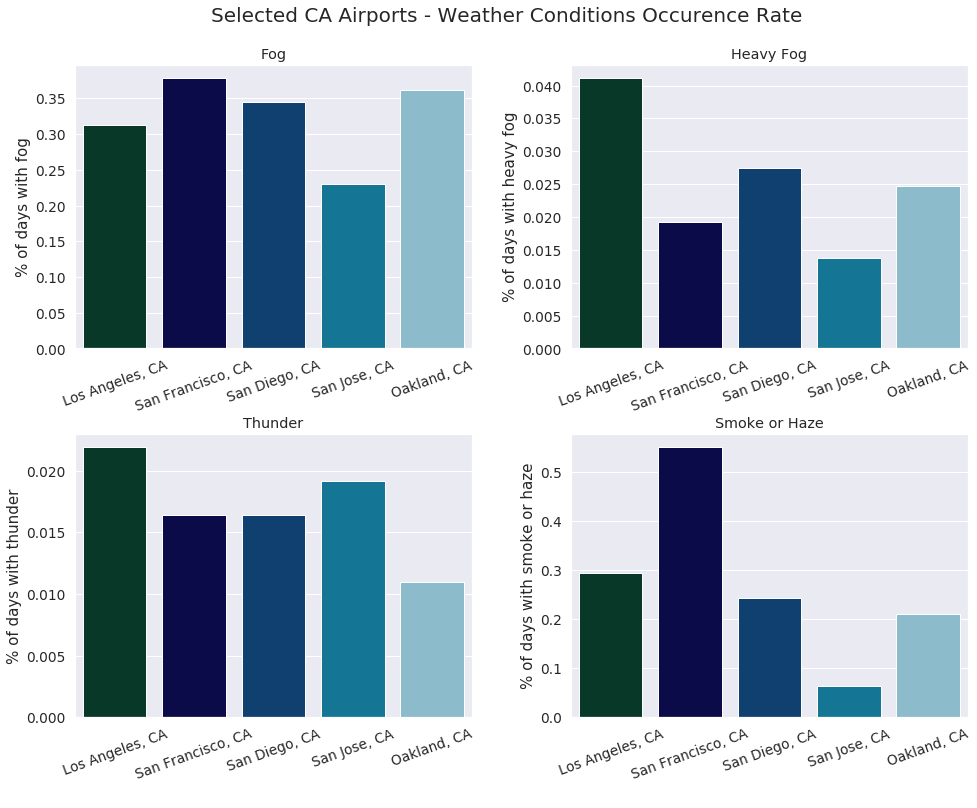

In [355]:
fig, axes = plt.subplots(2,2,figsize=(16,12))
sns.set(font_scale=1.2)

sns.barplot(x='ORIGIN_CITY_NAME',y='fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='heavy_fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,1])
sns.barplot(x='ORIGIN_CITY_NAME',y='thunder_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='smoke_haze_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,1])

axes[0,0].set(ylabel="% of days with fog")
axes[0,0].set_title('Fog')
axes[0,0].set_xlabel(' ')
axes[0,1].set(ylabel="% of days with heavy fog")
axes[0,1].set_title('Heavy Fog')
axes[1,0].set(ylabel="% of days with thunder")
axes[1,0].set_title('Thunder')
axes[1,1].set(ylabel="% of days with smoke or haze")
axes[1,1].set_title('Smoke or Haze')
for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
plt.figtext(.5,.93,'Selected CA Airports - Weather Conditions Occurence Rate', fontsize=20, ha='center')
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
plt.savefig('../img/weather_CA.png', bbox_inches = "tight")

# More t-test about weather

In [94]:
ca_five_flight_weather

ORIGIN_CITY_NAME    FL_DATE  total_flight  avg_delay_min  \
0     Los Angeles, CA 2019-02-01           605      16.117355   
1     Los Angeles, CA 2019-02-02           468      17.777778   
2     Los Angeles, CA 2019-02-03           537       9.040968   
3     Los Angeles, CA 2019-02-04           597      16.695142   
4     Los Angeles, CA 2019-02-05           552       5.038043   
...               ...        ...           ...            ...   
1819     San Jose, CA 2020-01-27           177      -2.949153   
1820     San Jose, CA 2020-01-28           162      -4.234568   
1821     San Jose, CA 2020-01-29           168      -2.476190   
1822     San Jose, CA 2020-01-30           176       2.971591   
1823     San Jose, CA 2020-01-31           177       3.463277   

      cancelled_count  cancel_rate             city       date  avg_wind_spd  \
0                 7.0     0.011570  Los Angeles, CA 2019-02-01          6.49   
1                 7.0     0.014957  Los Angeles, CA 2019-02-02         11.41   
2                 4.0     0.007449  Los Angeles, CA 2019-02-03          7.83   
3                13.0     0.021776  Los Angeles, CA 2019-02-04         12.30   
4                 6.0     0.010870  Los Angeles, CA 2019-02-05         14.32   
...               ...          ...              ...        ...           ...   
1819              1.0     0.005650     San Jose, CA 2020-01-27          4.03   
1820              5.0     0.030864     San Jose, CA 2020-01-28          4.47   
1821              1.0     0.005952     San Jose, CA 2020-01-29          7.38   
1822              0.0     0.000000     San Jose, CA 2020-01-30          3.36   
1823              3.0     0.016949     San Jose, CA 2020-01-31          2.01   

      precip  avg_temp  fog  heavy_fog  thunder  smoke_haze  
0       0.01      55.0  0.0        0.0      0.0         0.0  
1       1.45      57.0  1.0        0.0      0.0         0.0  
2       0.25      56.0  1.0        0.0      0.0         1.0  
3       0.27      56.0  1.0        0.0      0.0         0.0  
4       0.12      54.0  1.0        0.0      0.0         0.0  
...      ...       ...  ...        ...      ...         ...  
1819    0.00       0.0  0.0        0.0      0.0         0.0  
1820    0.01       0.0  1.0        0.0      0.0         0.0  
1821    0.00       0.0  0.0        0.0      0.0         0.0  
1822    0.00       0.0  1.0        0.0      0.0         0.0  
1823    0.00       0.0  1.0        1.0      0.0         0.0  

[1824 rows x 15 columns]

### LAX weather conditions and cancellation rate

In [360]:
lax_df =  ca_five_flight_weather[ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'Los Angeles, CA']

In [361]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

114 251
11.199373330264914 9.242458882119315
0.7046093225360924
2.7773042245624824 0.0030563608959674003


In [362]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'heavy_fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

15 350
8.512513364178506 9.911137253141337
1.5632028239633593
-0.8947168387380128 0.8074932878431003


In [363]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'thunder','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

8 357
10.161257633026278 9.846766605036233
2.1144679261582104
0.1487329384851181 0.4429007120443109


In [364]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'smoke_haze','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

107 258
9.010169809638553 10.203478951282255
0.6350120049319489
-1.8791914678393888 0.9691614723958684


### SFO and weather condition

In [365]:
sfo_df =  ca_five_flight_weather[ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA']

In [366]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 227
16.67798694165874 11.102852222334388
1.4246622846616341
3.9133026678308407 6.290298213264961e-05


In [367]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'heavy_fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

7 358
21.40148782123951 13.050556529804853
3.512412931910615
2.3775482704683237 0.026148160199895513


In [368]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'thunder','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

6 359
43.42882753505658 12.70567322342194
7.385401129307606
4.159984511838558 0.004291315517956726


In [369]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'smoke_haze','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

201 164
14.381992181107 11.77517819522138
1.2065631572323254
2.160528415160014 0.015706469058247283


Verify with scipy

In [119]:
a = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['fog'] == 1)]['avg_delay_min']
b = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['fog'] == 0)]['avg_delay_min']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=3.9133026678308456, pvalue=0.00012580596426529727)

In [134]:
a = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['smoke_haze'] == 1)]['avg_delay_min']
b = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['smoke_haze'] == 0)]['avg_delay_min']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=2.160528415160007, pvalue=0.03141293811649509)

### t-test between cities

In [370]:
city1 = 'San Francisco, CA'
city2 = 'Los Angeles, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 114
16.67798694165874 11.199373330264914
1.4444944953691103
3.792754924963478 9.903261287700614e-05


In [371]:
city1 = 'San Francisco, CA'
city2 = 'Los Angeles, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

227 251
11.102852222334388 9.242458882119315
0.6630026965182098
2.806011725118188 0.0026528660177452764


In [372]:
city1 = 'San Francisco, CA'
city2 = 'Oakland, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 132
16.67798694165874 10.483554853129164
1.5097918812441107
4.1028383881791655 2.864196581039635e-05


In [373]:
city1 = 'San Francisco, CA'
city2 = 'Oakland, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

227 232
11.102852222334388 8.370759608918156
0.6944841346416992
3.933988520595625 4.96945907246121e-05


In [374]:
city1 = 'San Francisco, CA'
city2 = 'San Jose, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 84
16.67798694165874 7.7394403337954305
1.5797983904915152
5.658029949683835 2.3964890552093214e-08


In [375]:
city1 = 'San Francisco, CA'
city2 = 'San Jose, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

227 281
11.102852222334388 4.999873325682397
0.6622974411676662
9.214861053807047 1.6605785350427294e-18


# Airline

In [158]:
print(df_one_year['OP_UNIQUE_CARRIER'].unique())
print(df_one_year['OP_UNIQUE_CARRIER'].nunique())

['AA' 'WN' '9E' 'OH' 'B6' 'NK' 'MQ' 'G4' 'YV' 'DL' 'HA' 'OO' 'UA' 'AS'
 'YX' 'EV' 'F9']
17


In [244]:
airline_pivot = df_one_year.groupby(['ORIGIN_CITY_NAME','OP_UNIQUE_CARRIER']).agg(
    total_flight=pd.NamedAgg(column='OP_UNIQUE_CARRIER',aggfunc='count'),
    total_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='sum'),
    total_dist=pd.NamedAgg(column='DISTANCE',aggfunc='sum'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
).reset_index()

In [245]:
airline_pivot

ORIGIN_CITY_NAME OP_UNIQUE_CARRIER  total_flight  total_delay_min  \
0        Aberdeen, SD                OO           750          12778.0   
1         Abilene, TX                MQ          2270          22259.0   
2     Adak Island, AK                AS           104           1663.0   
3       Aguadilla, PR                B6          1260          15846.0   
4       Aguadilla, PR                NK           678           5783.0   
...               ...               ...           ...              ...   
1941    Worcester, MA                OO           170           2336.0   
1942     Wrangell, AK                AS           724          -1182.0   
1943      Yakutat, AK                AS           722          -3855.0   
1944         Yuma, AZ                OO          1547           5624.0   
1945         Yuma, AZ                YV           443           4966.0   

      total_dist  cancelled_count  
0       192750.0             18.0  
1       358660.0             41.0  
2       123968.0              6.0  
3      1574649.0             10.0  
4       717981.0             10.0  
...          ...              ...  
1941     99960.0              1.0  
1942     40906.0             14.0  
1943    148371.0             24.0  
1944    539738.0              6.0  
1945     95878.0              2.0  

[1946 rows x 6 columns]

In [214]:
carrier_decode = pd.read_csv('../data/carrier_decode.csv')
carrier_decode.rename(columns={'UNIQUE_CARRIER':'OP_UNIQUE_CARRIER'}, inplace=True)
carrier_decode.drop(axis=1,columns=['Unnamed: 2'],inplace=True)
carrier_decode.drop_duplicates(inplace=True)
carrier_decode

OP_UNIQUE_CARRIER            UNIQUE_CARRIER_NAME
0                  02Q                  Titan Airways
1                  04Q             Tradewind Aviation
2                  05Q            Comlux Aviation, AG
3                  06Q  Master Top Linhas Aereas Ltd.
4                  07Q            Flair Airlines Ltd.
...                ...                            ...
2656                ZW    Air Wisconsin Airlines Corp
2660                ZX                   Air Georgian
2661            ZX (1)                     Airbc Ltd.
2662                ZY         Atlantic Gulf Airlines
2665               ZYZ           Skyway Aviation Inc.

[1672 rows x 2 columns]

In [246]:
airline_merge = airline_pivot.merge(carrier_decode,on="OP_UNIQUE_CARRIER",how='left')
airline_merge

ORIGIN_CITY_NAME OP_UNIQUE_CARRIER  total_flight  total_delay_min  \
0        Aberdeen, SD                OO           750          12778.0   
1         Abilene, TX                MQ          2270          22259.0   
2     Adak Island, AK                AS           104           1663.0   
3       Aguadilla, PR                B6          1260          15846.0   
4       Aguadilla, PR                NK           678           5783.0   
...               ...               ...           ...              ...   
1941    Worcester, MA                OO           170           2336.0   
1942     Wrangell, AK                AS           724          -1182.0   
1943      Yakutat, AK                AS           722          -3855.0   
1944         Yuma, AZ                OO          1547           5624.0   
1945         Yuma, AZ                YV           443           4966.0   

      total_dist  cancelled_count    UNIQUE_CARRIER_NAME  
0       192750.0             18.0  SkyWest Airlines Inc.  
1       358660.0             41.0              Envoy Air  
2       123968.0              6.0   Alaska Airlines Inc.  
3      1574649.0             10.0        JetBlue Airways  
4       717981.0             10.0       Spirit Air Lines  
...          ...              ...                    ...  
1941     99960.0              1.0  SkyWest Airlines Inc.  
1942     40906.0             14.0   Alaska Airlines Inc.  
1943    148371.0             24.0   Alaska Airlines Inc.  
1944    539738.0              6.0  SkyWest Airlines Inc.  
1945     95878.0              2.0     Mesa Airlines Inc.  

[1946 rows x 7 columns]

In [258]:
airline_merge_pivot_ = airline_merge.groupby('UNIQUE_CARRIER_NAME').agg(
    airline_flight_ct=pd.NamedAgg(column='total_flight',aggfunc='sum'),
    airline_dist=pd.NamedAgg(column='total_dist',aggfunc='sum'),
    airline_delay_min=pd.NamedAgg(column='total_delay_min',aggfunc='sum'),
    airline_cancel_ct=pd.NamedAgg(column='cancelled_count',aggfunc='sum')
).reset_index()
airline_merge_pivot_['cancel_rate'] = airline_merge_pivot_['airline_cancel_ct'] / airline_merge_pivot_['airline_flight_ct']
airline_merge_pivot_['avg_delay'] = airline_merge_pivot_['airline_delay_min'] / airline_merge_pivot_['airline_flight_ct']
airline_merge_pivot_['avg_dist'] = airline_merge_pivot_['airline_dist'] / airline_merge_pivot_['airline_flight_ct']
airline_merge_pivot_

UNIQUE_CARRIER_NAME  airline_flight_ct  airline_dist  \
0      Alaska Airlines Inc.             265182  3.487865e+08   
1             Allegiant Air             106316  9.209710e+07   
2    American Airlines Inc.             946035  9.379465e+08   
3      Delta Air Lines Inc.             998217  8.957706e+08   
4         Endeavor Air Inc.             260002  1.199874e+08   
5                 Envoy Air             327508  1.467867e+08   
6   ExpressJet Airlines LLC             132052  6.056856e+07   
7    Frontier Airlines Inc.             138363  1.422820e+08   
8    Hawaiian Airlines Inc.              84128  6.361242e+07   
9           JetBlue Airways             297677  3.321874e+08   
10       Mesa Airlines Inc.             227378  1.292752e+08   
11        PSA Airlines Inc.             290444  1.160103e+08   
12         Republic Airline             332517  1.975176e+08   
13    SkyWest Airlines Inc.             842679  4.129374e+08   
14   Southwest Airlines Co.            1362404  1.009223e+09   
15         Spirit Air Lines             207100  2.051706e+08   
16    United Air Lines Inc.             627396  7.503109e+08   

    airline_delay_min  airline_cancel_ct  cancel_rate  avg_delay     avg_dist  
0           1370157.0             2920.0     0.011011   5.166855  1315.272002  
1           1053891.0              660.0     0.006208   9.912817   866.258136  
2          11224981.0            19325.0     0.020427  11.865291   991.450091  
3           7863497.0             1555.0     0.001558   7.877543   897.370643  
4           2473578.0             3992.0     0.015354   9.513688   461.486258  
5           2912649.0            10325.0     0.031526   8.893367   448.192777  
6           2071060.0             5269.0     0.039901  15.683670   458.672016  
7           1878955.0             2275.0     0.016442  13.579895  1028.324408  
8            103551.0              147.0     0.001747   1.230874   756.138539  
9           4868483.0             2802.0     0.009413  16.354918  1115.932222  
10          3074935.0             6527.0     0.028706  13.523450   568.547520  
11          3145316.0             6337.0     0.021818  10.829337   399.423834  
12          2525999.0             6812.0     0.020486   7.596601   594.007440  
13         10026134.0            16093.0     0.019097  11.897928   490.029341  
14         13254298.0            31594.0     0.023190   9.728611   740.766633  
15          2193929.0             3510.0     0.016948  10.593573   990.683761  
16          7779461.0             4984.0     0.007944  12.399602  1195.912768

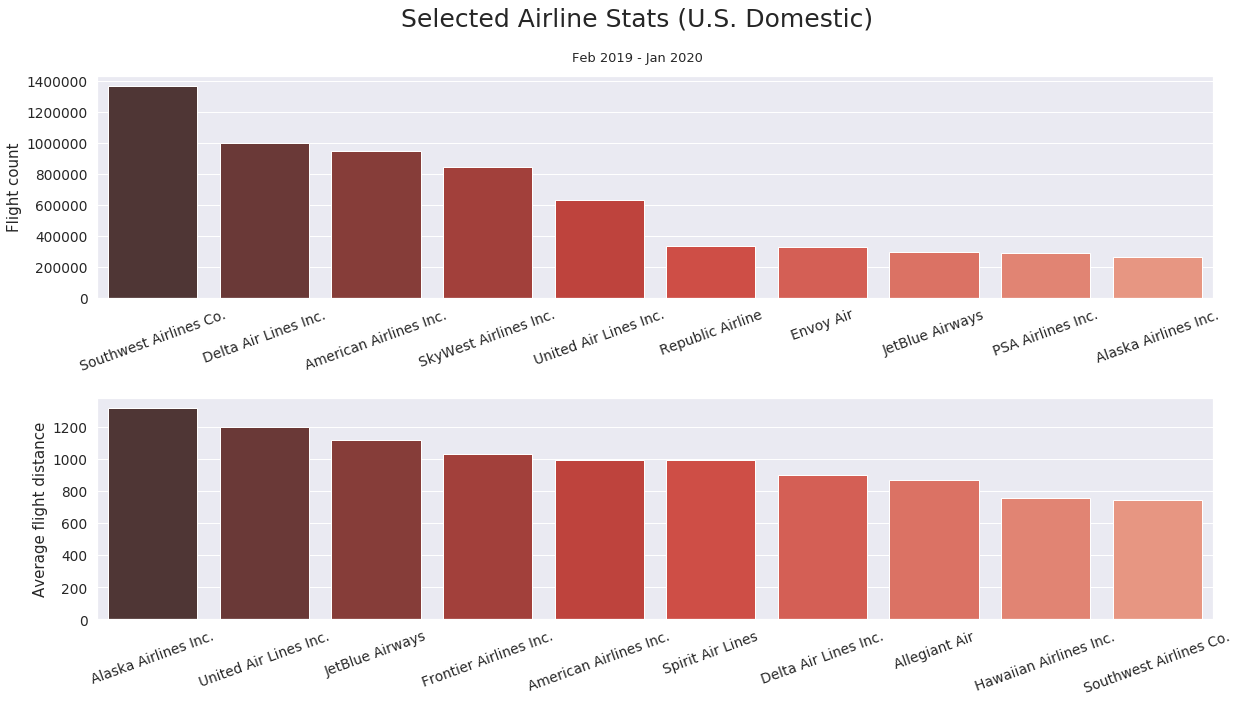

In [262]:
fig, axes = plt.subplots(2,1,figsize=(20,10))
sns.set(font_scale=1.25)

count = sns.barplot(x='UNIQUE_CARRIER_NAME',y='airline_flight_ct',data=airline_merge_pivot_.sort_values('airline_flight_ct', ascending=False)[0:10],palette='Reds_d',ax=axes[0])
dist = sns.barplot(x='UNIQUE_CARRIER_NAME',y='avg_dist',data=airline_merge_pivot_.sort_values('avg_dist', ascending=False)[0:10],palette='Reds_d',ax=axes[1])
# cancel = sns.barplot(x='UNIQUE_CARRIER_NAME',y='cancel_rate',data=airline_merge_pivot_.sort_values('cancel_rate', ascending=False),palette='Reds_d',ax=axes[1])
# delay = sns.barplot(x='UNIQUE_CARRIER_NAME',y='avg_delay',data=airline_merge_pivot_.sort_values('avg_delay', ascending=False),palette='Reds_d',ax=axes[2])

axes[0].set_ylabel('Flight count')
axes[1].set_ylabel('Average flight distance')
# axes[1].set_ylabel('Cancellation rate')
# axes[2].set_ylabel('Average delay (mins)')

for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')

plt.figtext(.5,.95,'Selected Airline Stats (U.S. Domestic)', fontsize=25, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.subplots_adjust(hspace = 0.45)

# fig.savefig('img/airline_most_flight.png')

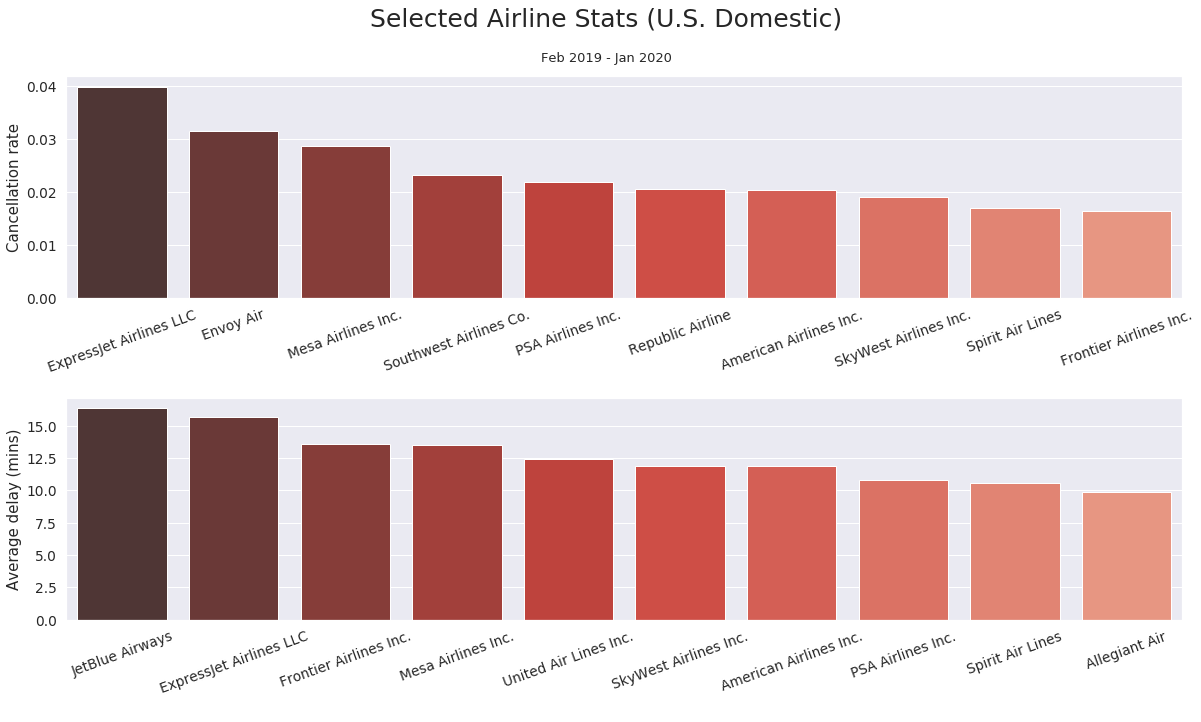

In [267]:
fig, axes = plt.subplots(2,1,figsize=(20,10))
sns.set(font_scale=1.25)

cancel = sns.barplot(x='UNIQUE_CARRIER_NAME',y='cancel_rate',data=airline_merge_pivot_.sort_values('cancel_rate', ascending=False)[0:10],palette='Reds_d',ax=axes[0])
delay = sns.barplot(x='UNIQUE_CARRIER_NAME',y='avg_delay',data=airline_merge_pivot_.sort_values('avg_delay', ascending=False)[0:10],palette='Reds_d',ax=axes[1])

axes[0].set_ylabel('Cancellation rate')
axes[1].set_ylabel('Average delay (mins)')

for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')

plt.figtext(.5,.95,'Selected Airline Stats (U.S. Domestic)', fontsize=25, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.subplots_adjust(hspace = 0.45)

# fig.savefig('img/airline_cancel_delay.png')

In [268]:
city_filter = ['San Francisco, CA']
airline_merge_pivot_sfo = airline_merge[airline_merge['ORIGIN_CITY_NAME'].isin(city_filter)].groupby('UNIQUE_CARRIER_NAME').agg(
    airline_flight_ct=pd.NamedAgg(column='total_flight',aggfunc='sum'),
    airline_cancel_ct=pd.NamedAgg(column='cancelled_count',aggfunc='sum'),
    airline_delay_sum=pd.NamedAgg(column='total_delay_min',aggfunc='sum'),
    airline_dist_sum=pd.NamedAgg(column='total_dist',aggfunc='sum'),
).reset_index()
airline_merge_pivot_sfo['cancel_rate'] = airline_merge_pivot_sfo['airline_cancel_ct'] / airline_merge_pivot_sfo['airline_flight_ct']
airline_merge_pivot_sfo['avg_delay'] = airline_merge_pivot_sfo['airline_delay_sum'] / airline_merge_pivot_sfo['airline_flight_ct']
airline_merge_pivot_sfo['avg_dist'] = airline_merge_pivot_sfo['airline_dist_sum'] / airline_merge_pivot_sfo['airline_flight_ct']
airline_merge_pivot_sfo

UNIQUE_CARRIER_NAME  airline_flight_ct  airline_cancel_ct  \
0    Alaska Airlines Inc.              22603              432.0   
1  American Airlines Inc.              13657              321.0   
2    Delta Air Lines Inc.              15316                5.0   
3  Frontier Airlines Inc.               1516               28.0   
4  Hawaiian Airlines Inc.                834               12.0   
5         JetBlue Airways               5339                8.0   
6   SkyWest Airlines Inc.              39988             1469.0   
7  Southwest Airlines Co.              14599              737.0   
8   United Air Lines Inc.              57061              225.0   

   airline_delay_sum  airline_dist_sum  cancel_rate  avg_delay     avg_dist  
0           192227.0        26295242.0     0.019113   8.504491  1163.351856  
1           204180.0        24158848.0     0.023504  14.950575  1768.971809  
2           168697.0        22887679.0     0.000326  11.014429  1494.363998  
3            38002.0         1775698.0     0.018470  25.067282  1171.304749  
4             6858.0         1978032.0     0.014388   8.223022  2371.741007  
5            72009.0        12449632.0     0.001498  13.487357  2331.828432  
6           614450.0        22480623.0     0.036736  15.365860   562.184230  
7           160167.0         9021989.0     0.050483  10.971094   617.986780  
8           726353.0        85169810.0     0.003943  12.729412  1492.609839

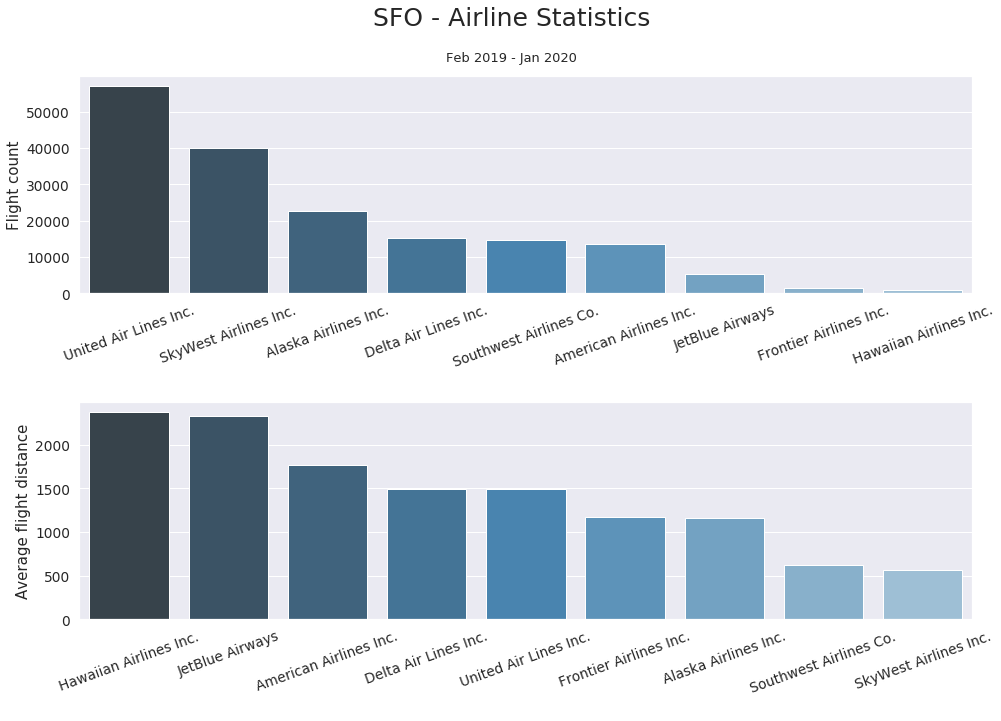

In [377]:
fig, axes = plt.subplots(2,1,figsize=(16,10))
sns.set(font_scale=1.25)

count = sns.barplot(x='UNIQUE_CARRIER_NAME',y='airline_flight_ct',data=airline_merge_pivot_sfo.sort_values('airline_flight_ct', ascending=False),palette='Blues_d',ax=axes[0])
rate = sns.barplot(x='UNIQUE_CARRIER_NAME',y='avg_dist',data=airline_merge_pivot_sfo.sort_values('avg_dist', ascending=False),palette='Blues_d',ax=axes[1])

axes[0].set_xlabel(' ')
axes[0].set_ylabel('Flight count')
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Average flight distance')

for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')

plt.figtext(.5,.95,'SFO - Airline Statistics', fontsize=25, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

plt.subplots_adjust(hspace = 0.5)
plt.savefig('../img/airline_SFO_1.png', bbox_inches = "tight")

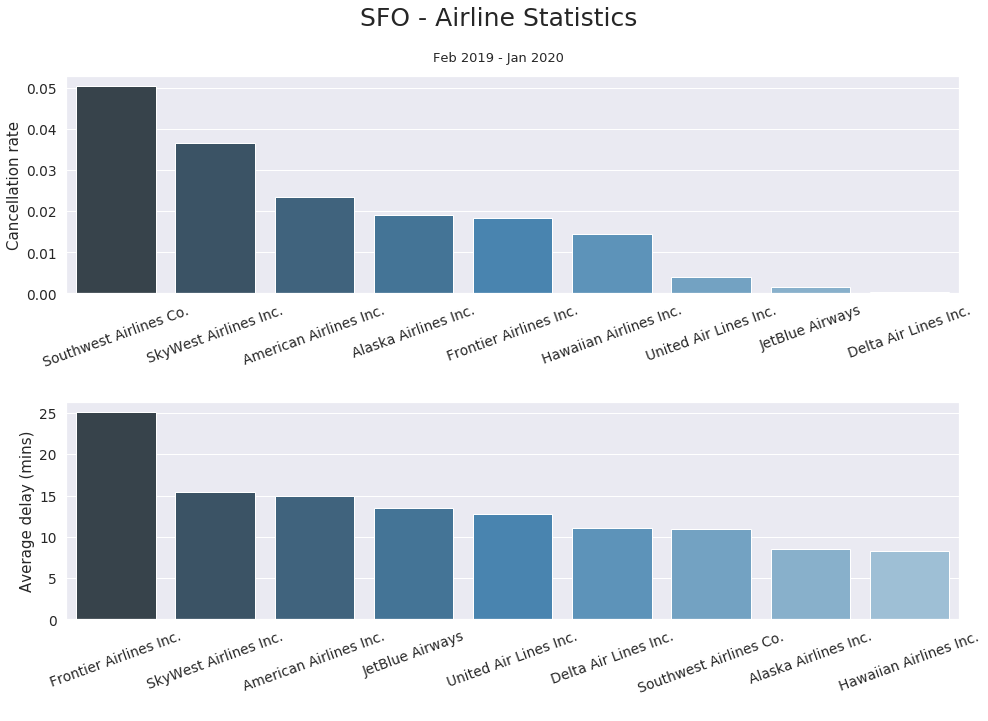

In [378]:
fig, axes = plt.subplots(2,1,figsize=(16,10))
sns.set(font_scale=1.25)

cancel = sns.barplot(x='UNIQUE_CARRIER_NAME',y='cancel_rate',data=airline_merge_pivot_sfo.sort_values('cancel_rate', ascending=False),palette='Blues_d',ax=axes[0])
rate = sns.barplot(x='UNIQUE_CARRIER_NAME',y='avg_delay',data=airline_merge_pivot_sfo.sort_values('avg_delay', ascending=False),palette='Blues_d',ax=axes[1])

axes[0].set_xlabel(' ')
axes[0].set_ylabel('Cancellation rate')
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Average delay (mins)')

for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')

plt.figtext(.5,.95,'SFO - Airline Statistics', fontsize=25, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

plt.subplots_adjust(hspace = 0.5)
plt.savefig('../img/airline_SFO_2.png', bbox_inches = "tight")

# Airline hypothesis testing

In [424]:
df_ = df_one_year
city1 = 'San Francisco, CA'
city2 = 'San Francisco, CA'
airline1 = 'F9'
airline2 = 'OO'
col = 'DEP_DELAY'

N1, N2, s1mean, s2mean, a_b_std, t_score, p_val = airline_t_test(df_, city1, city2, airline1, airline2, col)
print(N1, N2)
print(s1mean, s2mean)
print(a_b_std)
print(t_score, p_val / 2)

1489 38569
25.521826729348557 15.931188260001555
1.3221788846633853
7.253661800678878 3.096006422278701e-13


In [427]:
df_ = df_one_year
city1 = 'San Francisco, CA'
city2 = 'San Francisco, CA'
airline1 = 'OO'
airline2 = 'AA'
col = 'DEP_DELAY'

N1, N2, s1mean, s2mean, a_b_std, t_score, p_val = airline_t_test(df_, city1, city2, airline1, airline2, col)
print(N1, N2)
print(s1mean, s2mean)
print(a_b_std)
print(t_score, p_val / 2)

38569 13342
15.931188260001555 15.303552690751012
0.6303266064413431
0.9957307256852242 0.1596959091675042


In [426]:
df_ = df_one_year
city1 = 'San Francisco, CA'
city2 = 'San Francisco, CA'
airline1 = 'AA'
airline2 = 'B6'
col = 'DEP_DELAY'

N1, N2, s1mean, s2mean, a_b_std, t_score, p_val = airline_t_test(df_, city1, city2, airline1, airline2, col)
print(N1, N2)
print(s1mean, s2mean)
print(a_b_std)
print(t_score, p_val / 2)

13342 5331
15.303552690751012 13.507597073719753
0.896137954757039
2.004106184207072 0.022540587625999482


In [428]:
df_ = df_one_year
city1 = 'San Francisco, CA'
city2 = 'San Francisco, CA'
airline1 = 'B6'
airline2 = 'UA'
col = 'DEP_DELAY'

N1, N2, s1mean, s2mean, a_b_std, t_score, p_val = airline_t_test(df_, city1, city2, airline1, airline2, col)
print(N1, N2)
print(s1mean, s2mean)
print(a_b_std)
print(t_score, p_val / 2)

5331 56843
13.507597073719753 12.778231268581884
0.7309888321762861
0.9977796828529033 0.15921298913401188


In [422]:
df_ = df_one_year
city1 = 'San Francisco, CA'
city2 = 'San Francisco, CA'
airline1 = 'UA'
airline2 = 'AS'
col = 'DEP_DELAY'

N1, N2, s1mean, s2mean, a_b_std, t_score, p_val = airline_t_test(df_, city1, city2, airline1, airline2, col)
print(N1, N2)
print(s1mean, s2mean)
print(a_b_std)
print(t_score, p_val / 2)

56843 22180
12.778231268581884 8.66668169522092
0.28927817100394243
14.213134572483625 4.6126409327116905e-46


In [421]:
df_ = df_one_year
city1 = 'San Francisco, CA'
city2 = 'San Francisco, CA'
airline1 = 'UA'
airline2 = 'WN'
col = 'DEP_DELAY'

N1, N2, s1mean, s2mean, a_b_std, t_score, p_val = airline_t_test(df_, city1, city2, airline1, airline2, col)
print(N1, N2)
print(s1mean, s2mean)
print(a_b_std)
print(t_score, p_val/2)

56843 13863
12.778231268581884 11.553559835533434
0.3385214711258966
3.6177068148005076 0.0001488864487215046


check w/ scipy

In [415]:
df_ = df_one_year
city1 = 'San Francisco, CA'
city2 = 'San Francisco, CA'
airline1 = 'UA'
airline2 = 'WN'
col = 'DEP_DELAY'
a = df_[(df_['ORIGIN_CITY_NAME'] == city1) & (df_['OP_UNIQUE_CARRIER'] == airline1) & (df_[col].isnull() == False)][col]
b = df_[(df_['ORIGIN_CITY_NAME'] == city2) & (df_['OP_UNIQUE_CARRIER'] == airline2) & (df_[col].isnull() == False)][col]
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=3.6176053707798816, pvalue=0.00029788955374045276)